In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [3]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [4]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [5]:
all_obs_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [6]:
all_obs_data.head(10)

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   
5  0.268538 -0.139394  0.139394   0  -1.000000   0.518539  761  0.302804   
6  0.035630 -0.027685  0.027685   0  -1.000000   0.768538  761  1.408409   
7  0.785155 -0.804363  0.804363   0  -1.000000   0.535630  761  0.571150   
8  0.352873  0.064818 -0.064818   0  -1.000000   1.285155  761  4.114561   
9  0.206726 -2.800194  2.800194   0  -0.935182   0.852873  761  0.822059   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   
5  0.275119  3.036967      ...                           5   
6  0.604046  0.000000      ...                           6   
7  0.635969  4.661588      ...                           7   
8  1.314367 -0.099227      ...                           8   
9  1.379872  4.103838      ...                           9   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   
5                    6                             5             6  0.305556   
6                    7                             6             7  0.305556   
7                    8                             7             8  0.305556   
8                    9                             8             9  0.305556   
9                   10                             9            10  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  
5              36            111              111        111              1  
6              36            111              112        111              1  
7              36            111              111        111              1  
8              36            111              111        111              1  
9              36            111              111        112              0  

[10 rows x 44 columns]

In [7]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  

[5 rows x 44 columns]

In [10]:
all_obs_data.columns, all_obs_data.shape

(Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
        'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
        'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
        'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
        'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
        'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
        'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
        'epoch_trial_zero_idx', 'epoch_trial_one_idx',
        'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
        'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
        'p_id_accuracy'],
       dtype='object'), (57600, 44))

In [11]:
np.unique(all_obs_data.id_choice)

array([111, 112])

In [12]:
all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

In [13]:
all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

In [14]:
all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

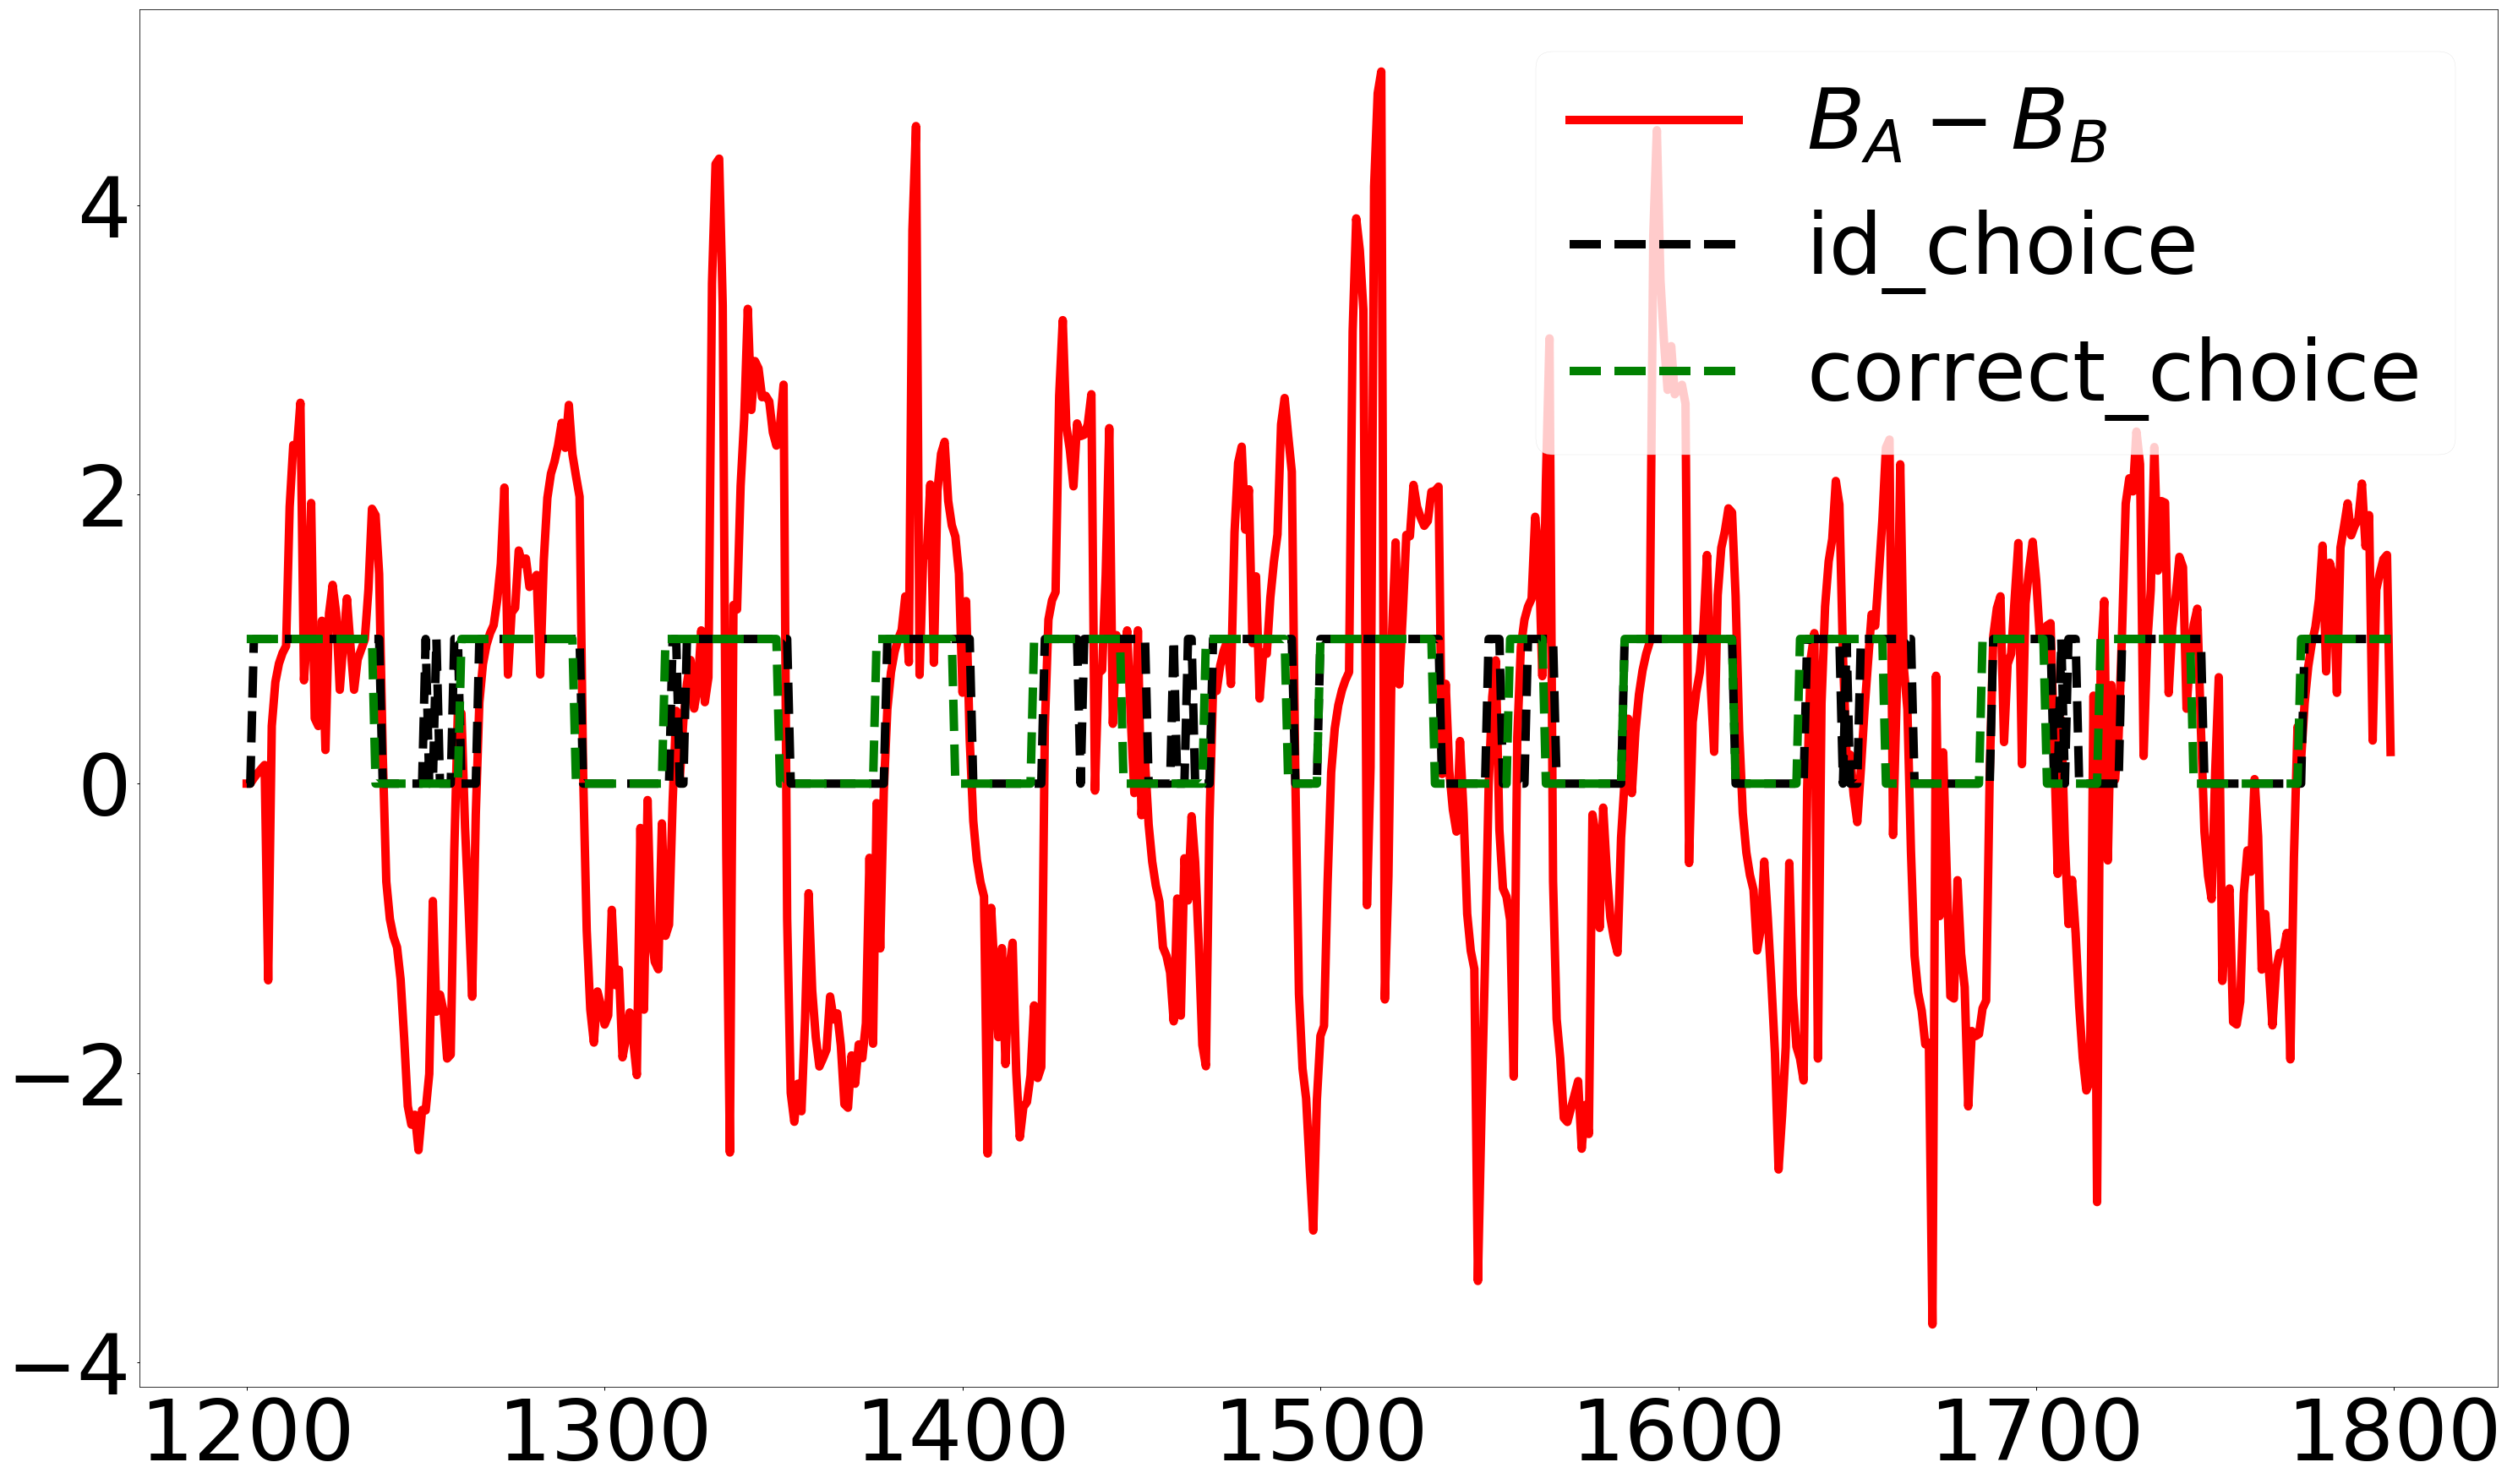

In [15]:
#use a low conflict sample to test direction
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.target_B, 'r', label='$B_{A} - B_{B}$')
plt.plot(all_obs_data_sample_lc.id_choice, 'k--', label='id_choice')
plt.plot(all_obs_data_sample_lc.p_id_solution, 'g--', label='correct_choice')
plt.legend()

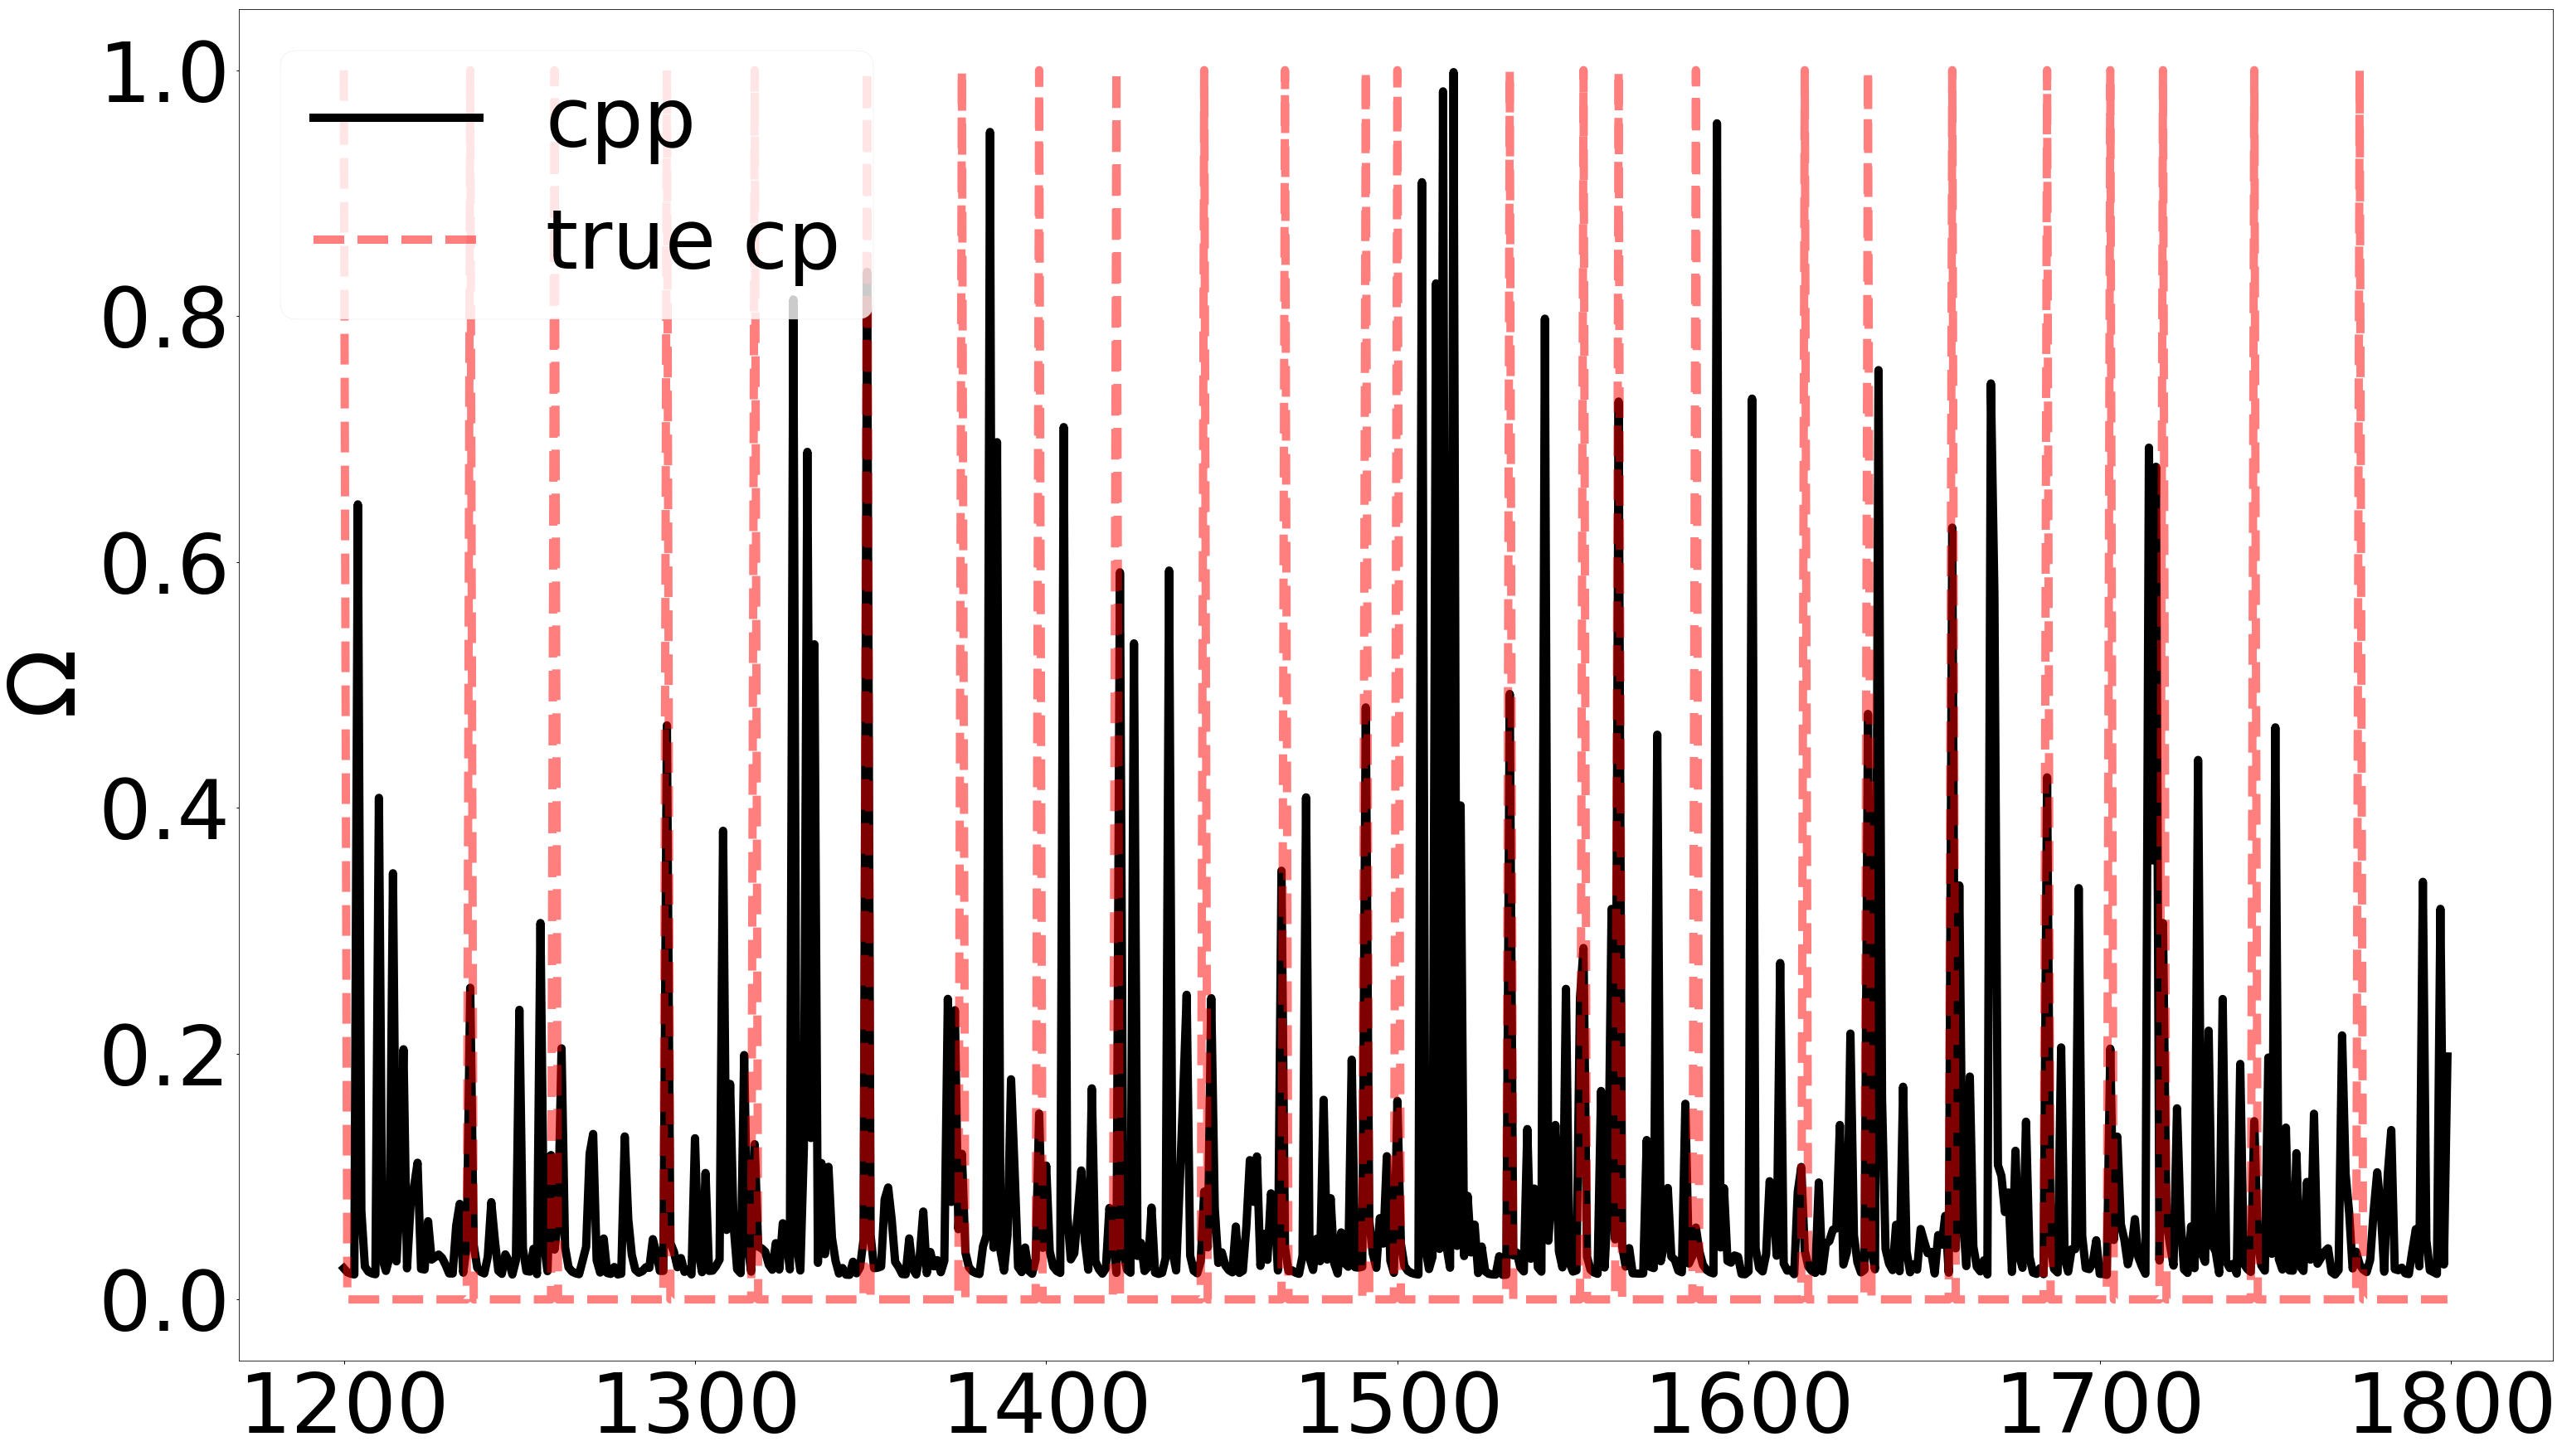

In [16]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.cpp[0:600], 'k', label='cpp')
plt.plot(all_obs_data_sample_lc.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [17]:
#use target choice as response 
#include correct target choice as stimulus 
all_obs_data = all_obs_data.rename(index=str, columns={"id_choice": "response", 
                                                       "p_id_solution": "stimulus",
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_obs_data = all_obs_data.rename(index=str, columns={'target_B': 'B'})
# all_obs_data = all_obs_data[(all_obs_data.rt<0.6)]
# all_obs_data.reset_index(drop=True, inplace=True)

In [18]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

response  stimulus        rt condition  subj_idx         B       cpp
0         0         0  0.711570        hc       761  0.000000  0.099471
1         1         0  0.681410        hc       761  0.000000  0.035079
2         0         0  0.767118        hc       761 -1.241007  0.023075
3         1         0  0.507209        hc       761 -0.595781  0.019881
4         0         0  0.656259        hc       761 -0.306135  0.018539

In [30]:
np.unique(all_obs_data.subj_idx), np.unique(all_obs_data.condition)

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [20]:
#these are no longer error flipped but stimulus flipped 
# all_obs_data = hddm.utils.flip_errors(all_obs_data)

In [21]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_obs_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [22]:
all_obs_data.columns

Index(['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

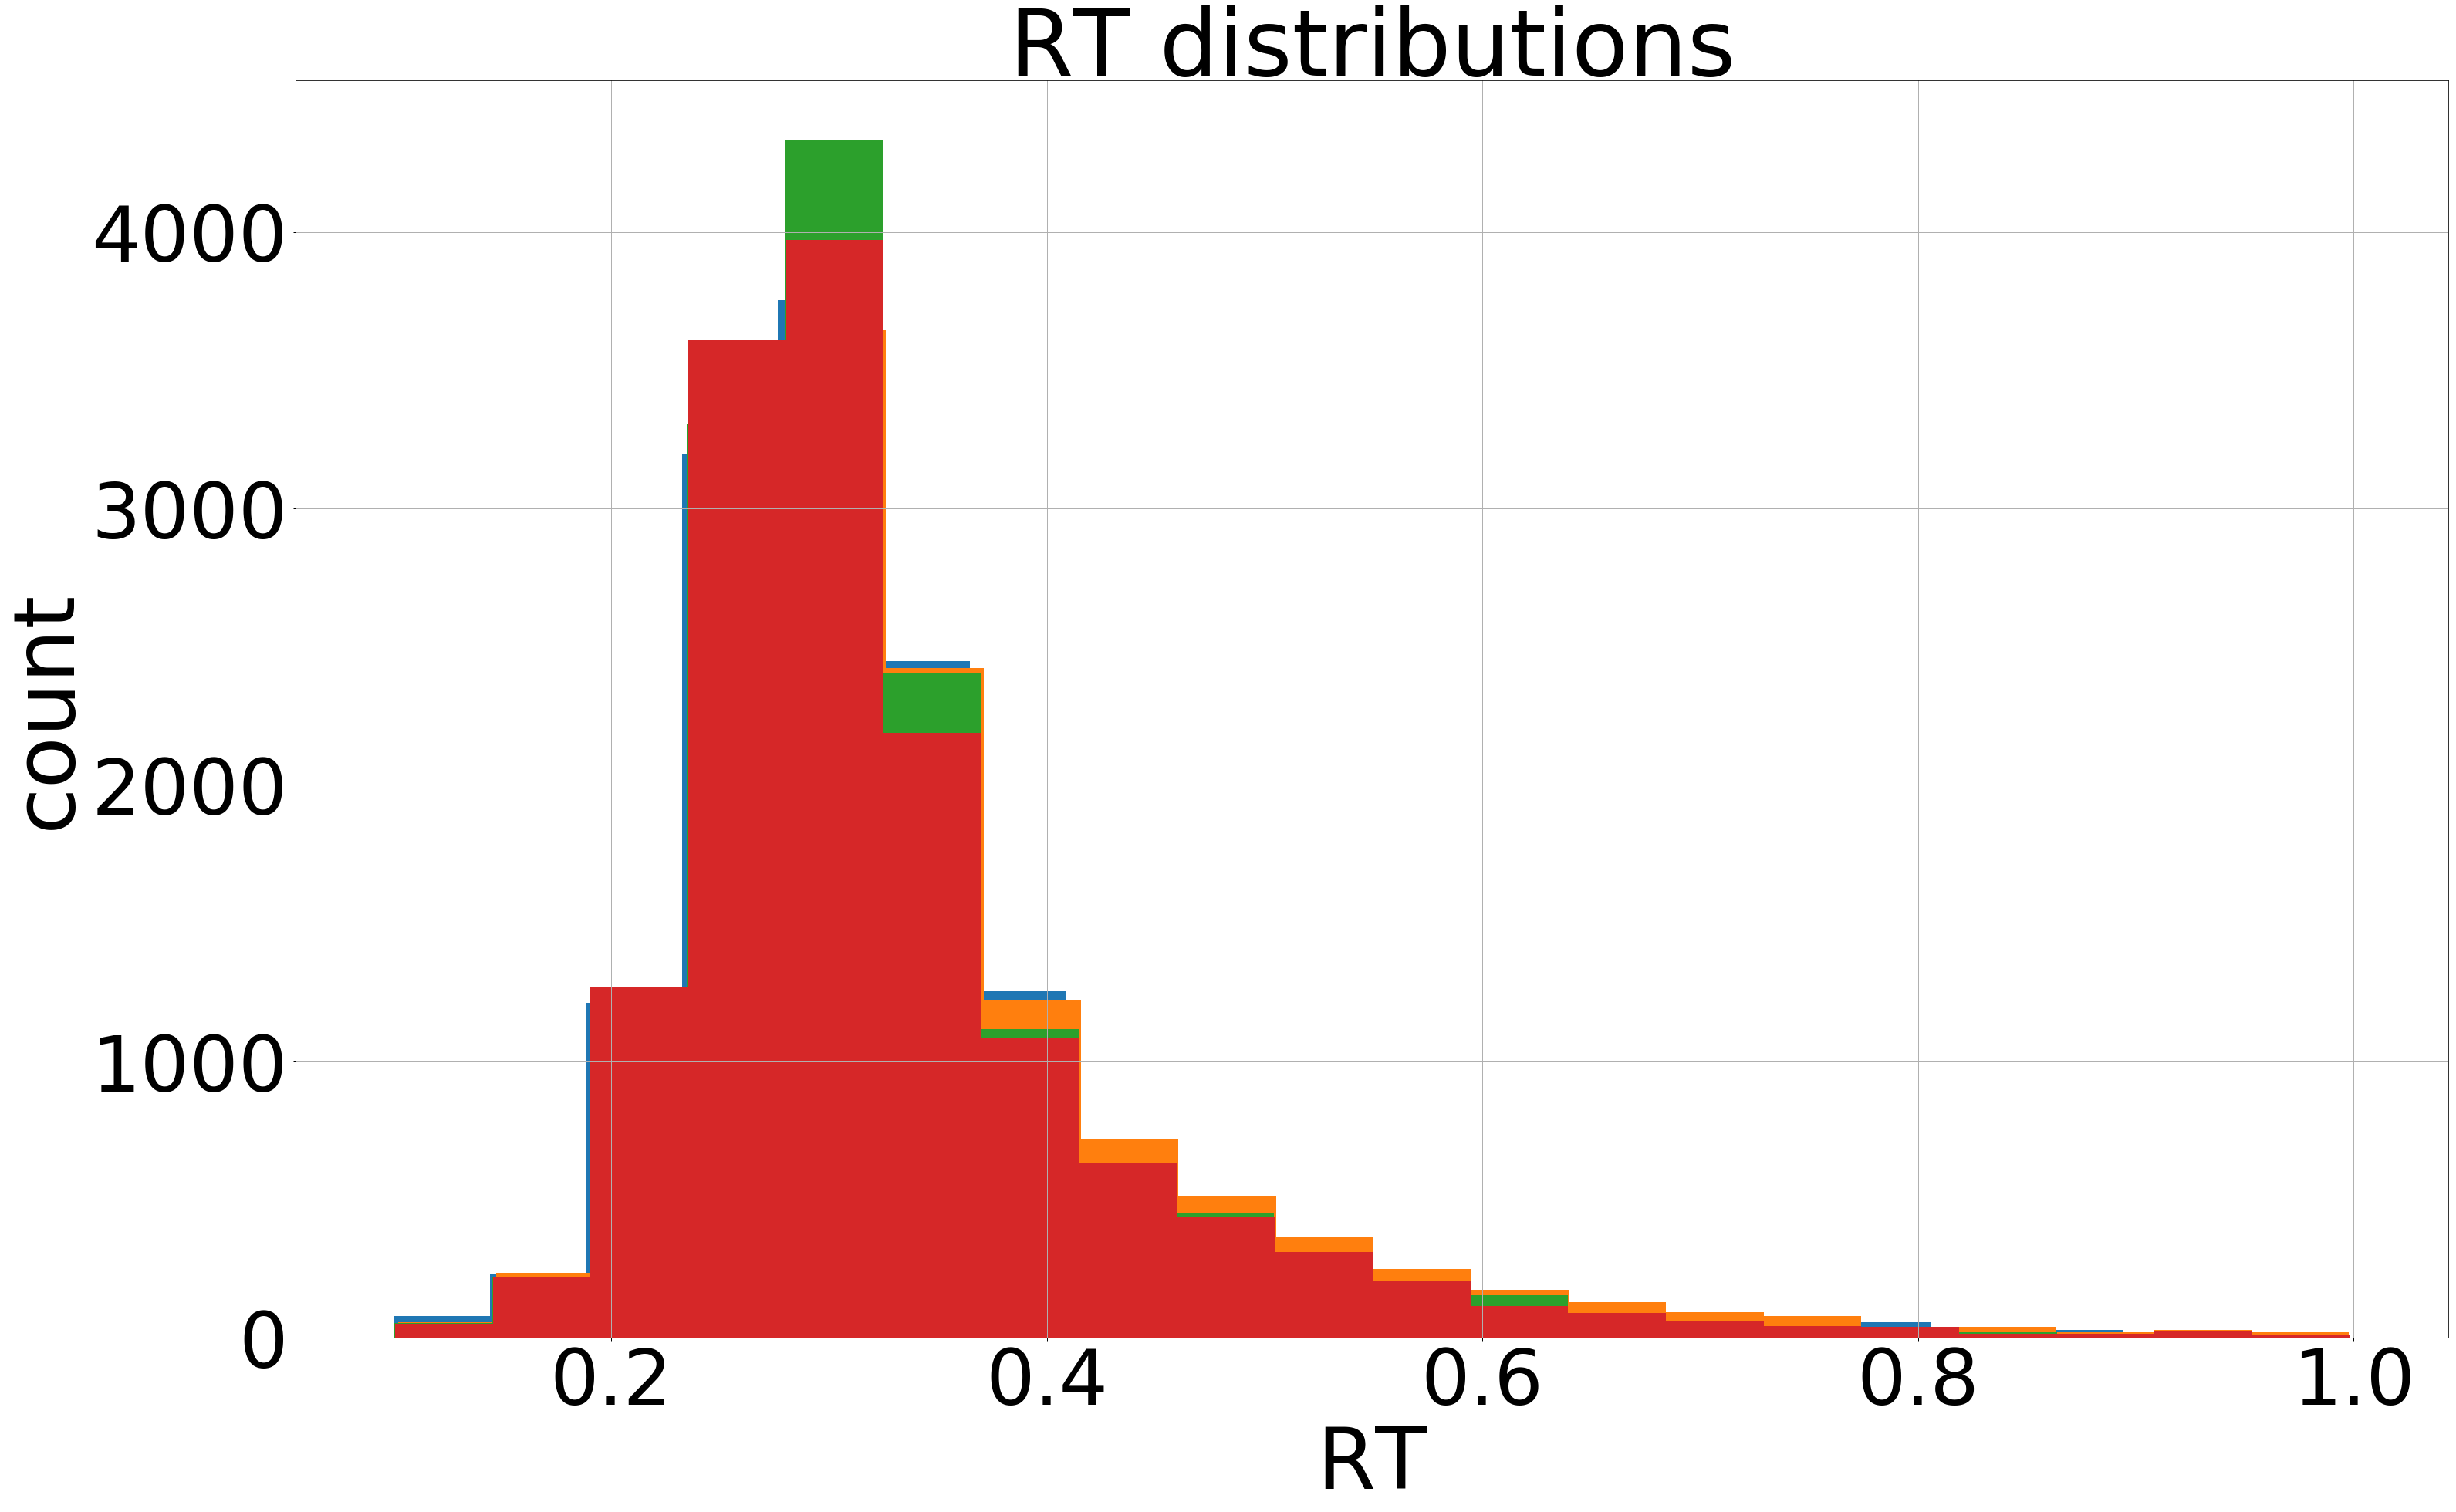

In [23]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

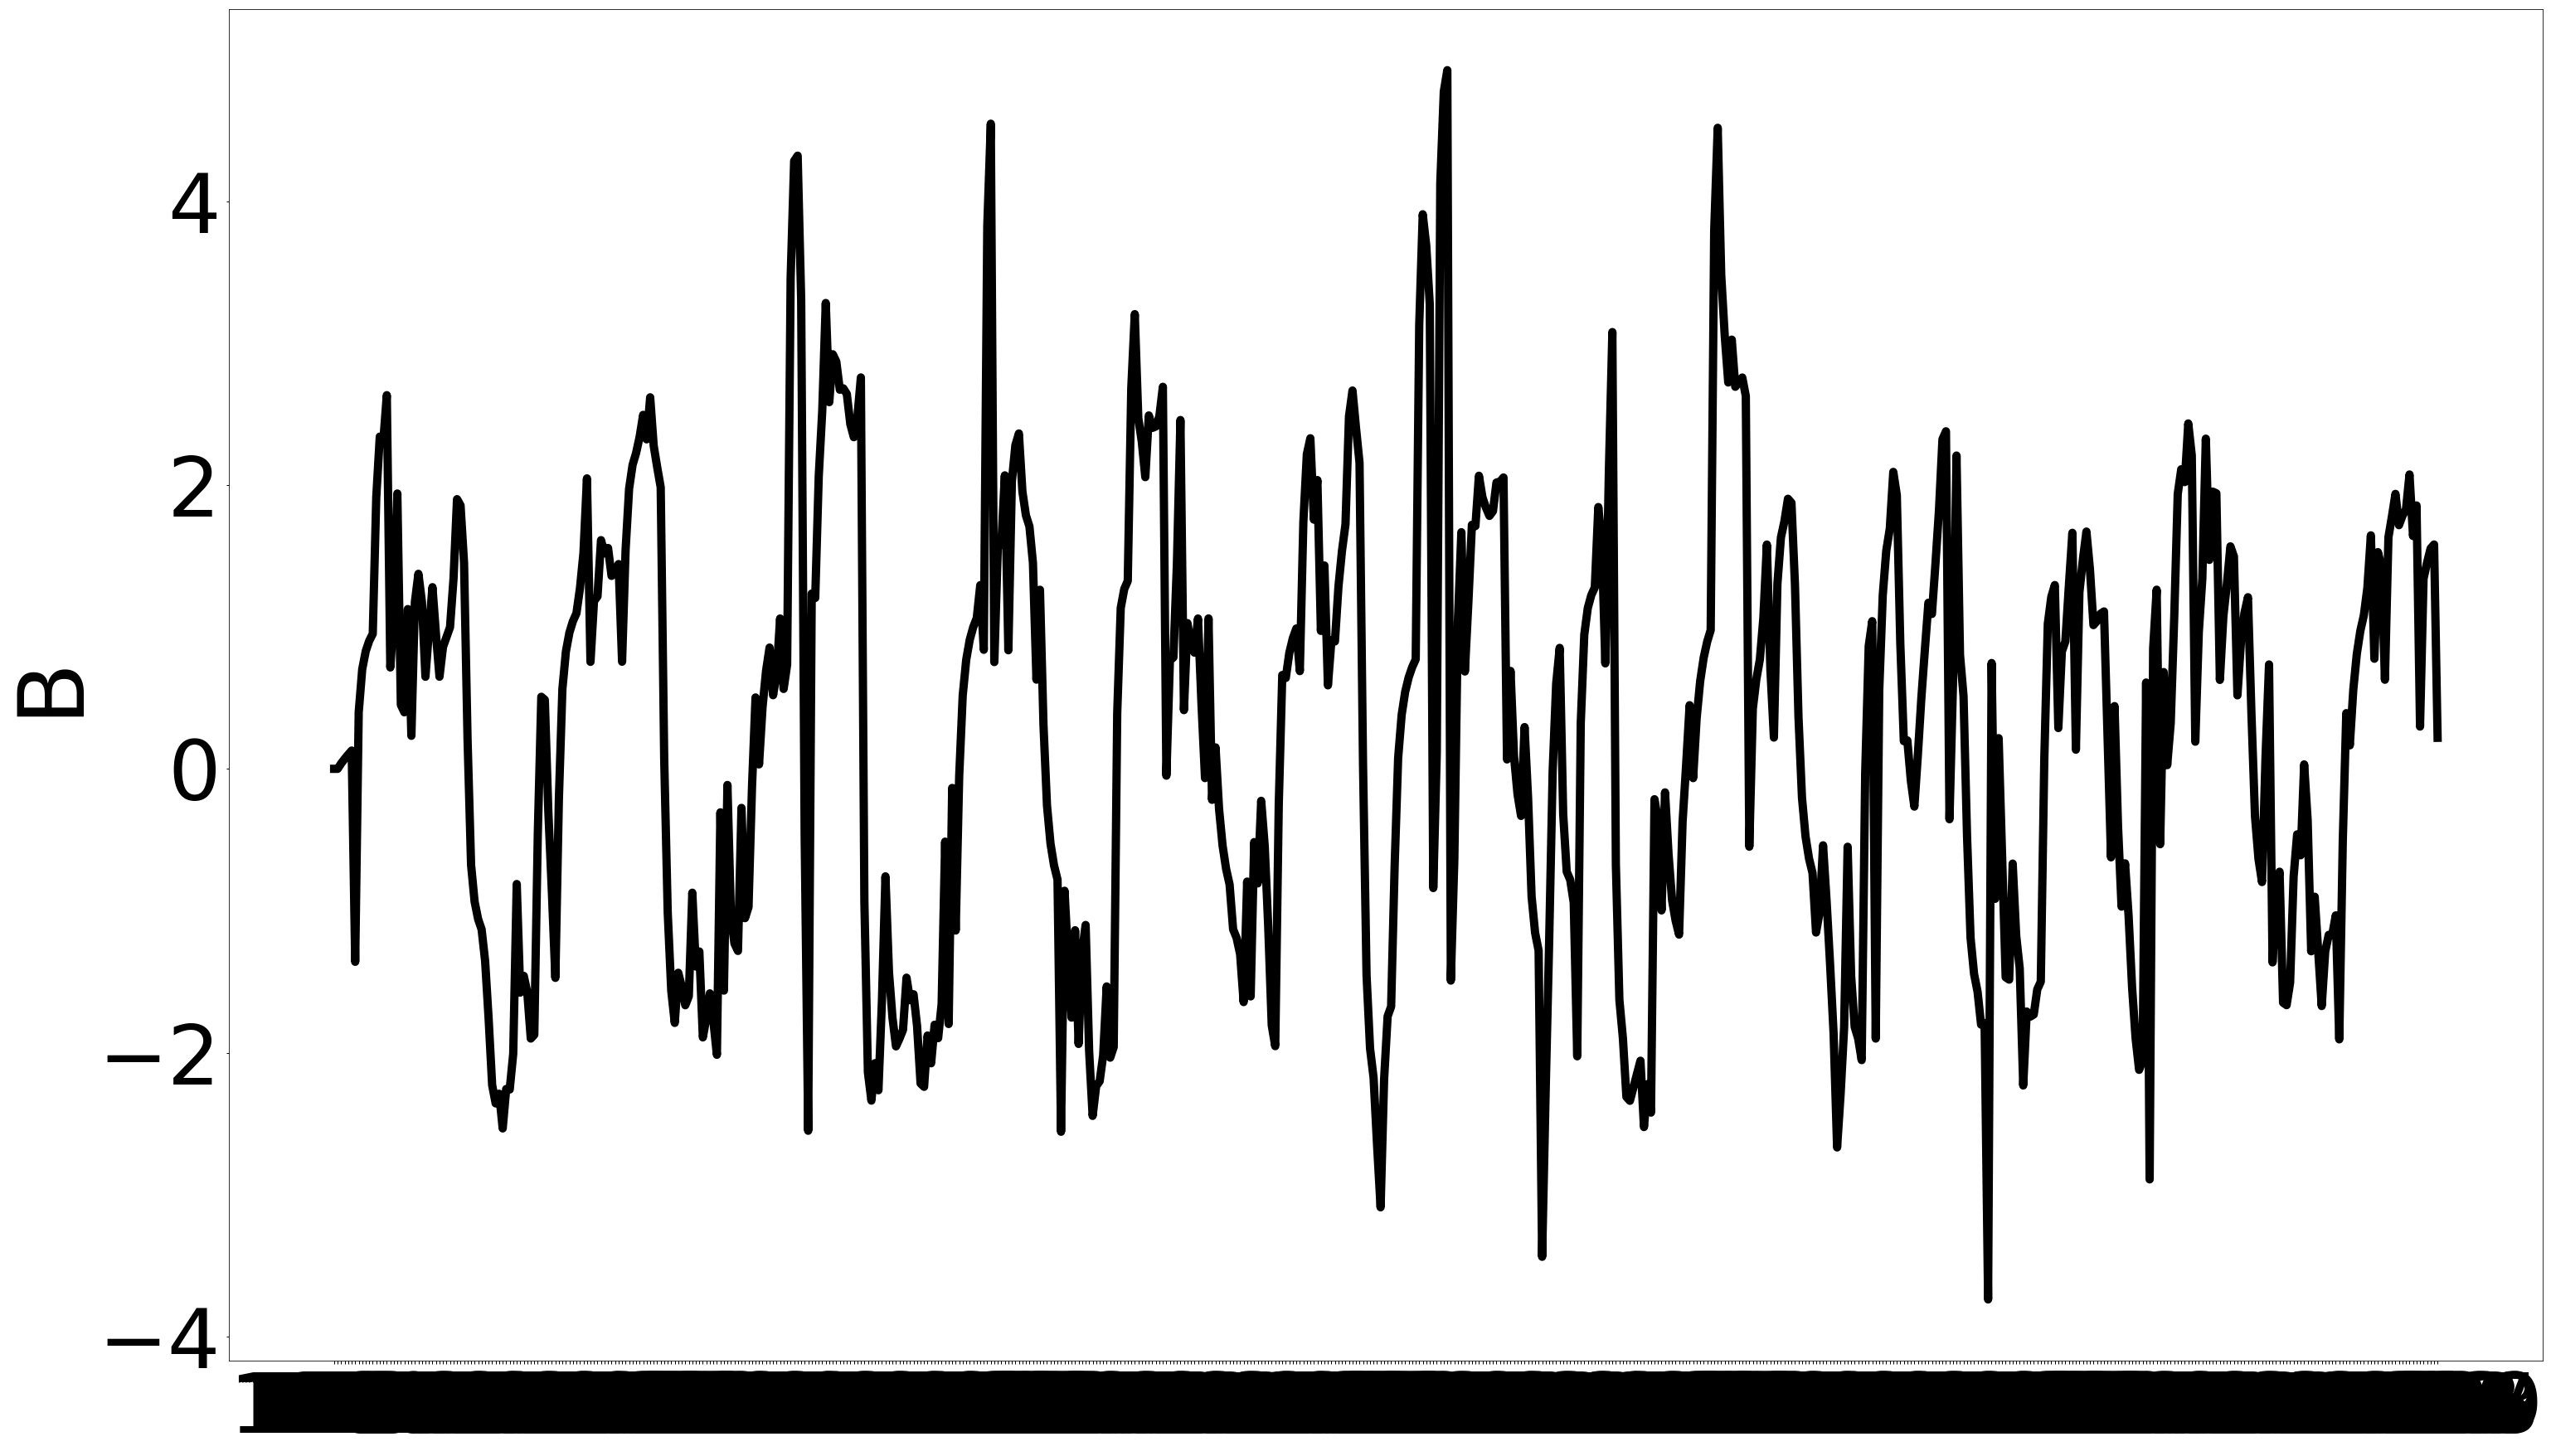

In [24]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.B[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

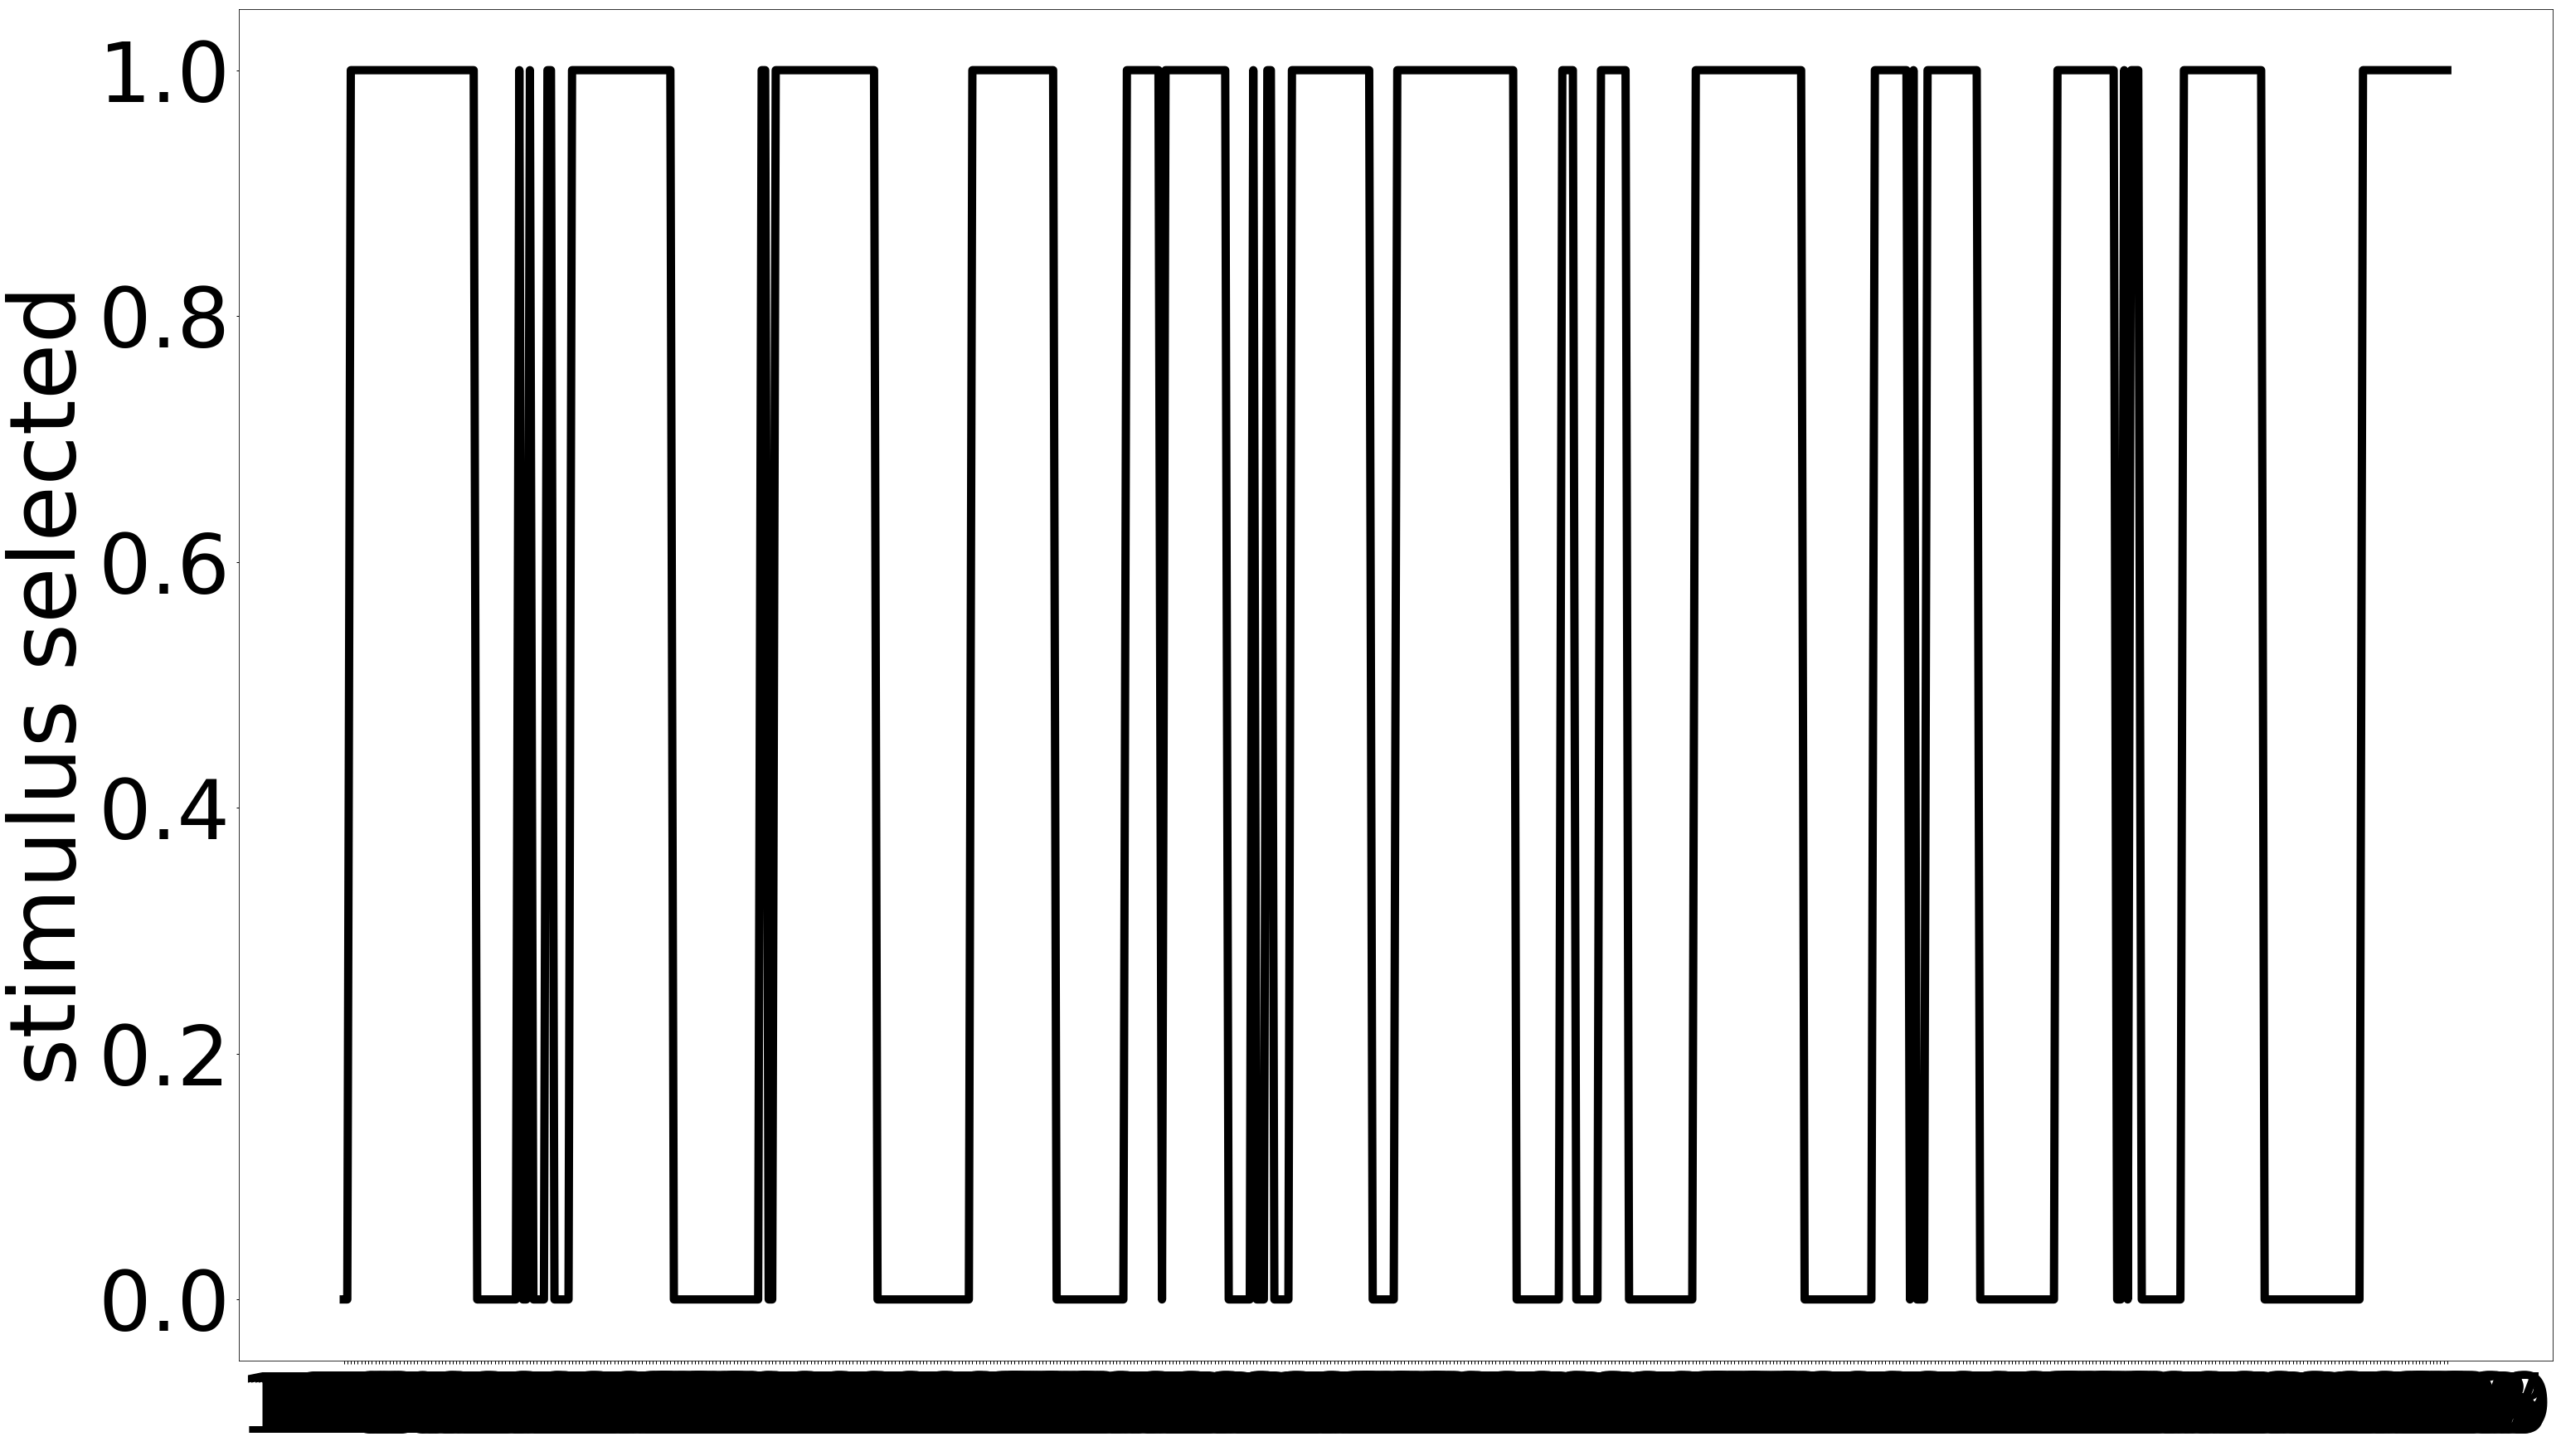

In [25]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.response[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [26]:
all_obs_data.columns

Index(['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

Text(0,0.5,'obs. rt')

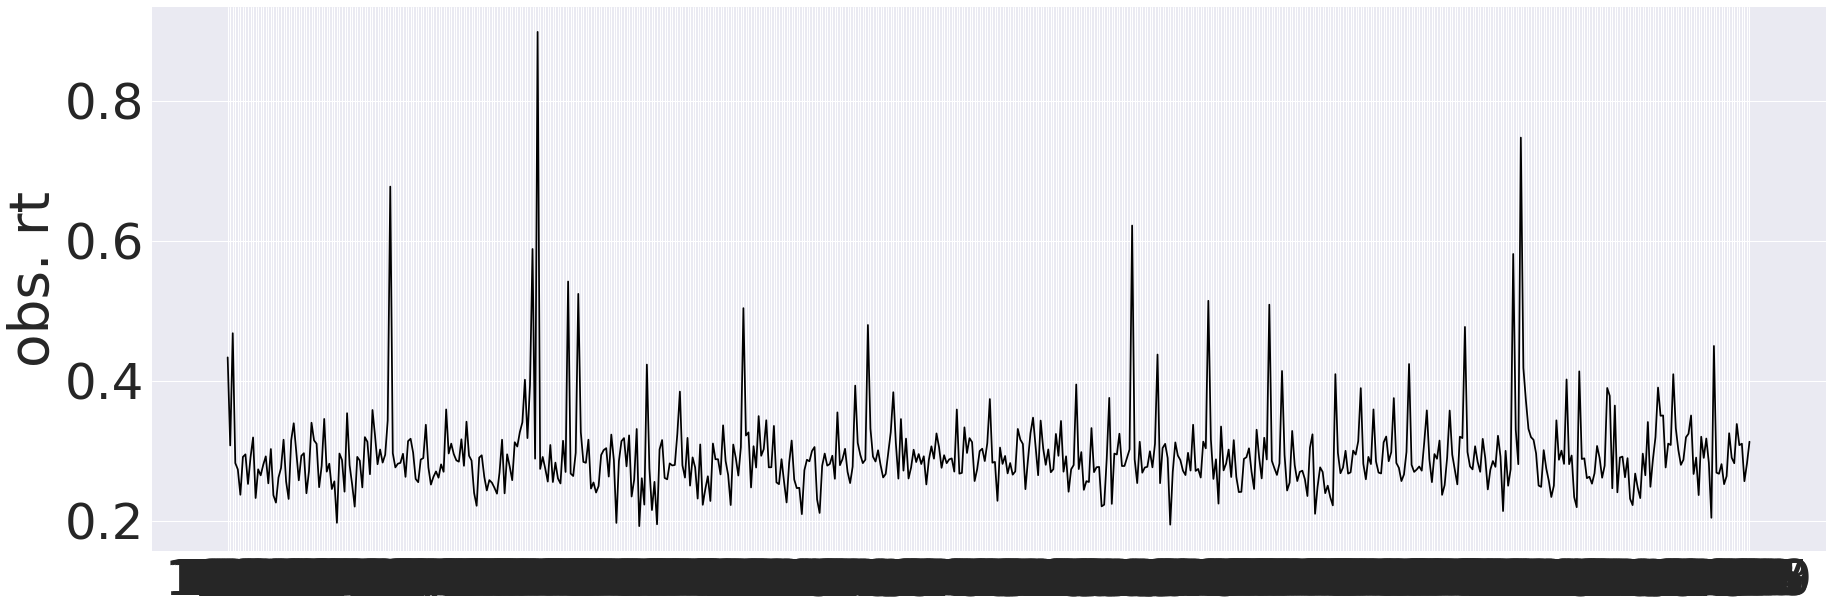

In [27]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_obs_data.rt[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('obs. rt')

Text(0,0.5,'correct stimulus')

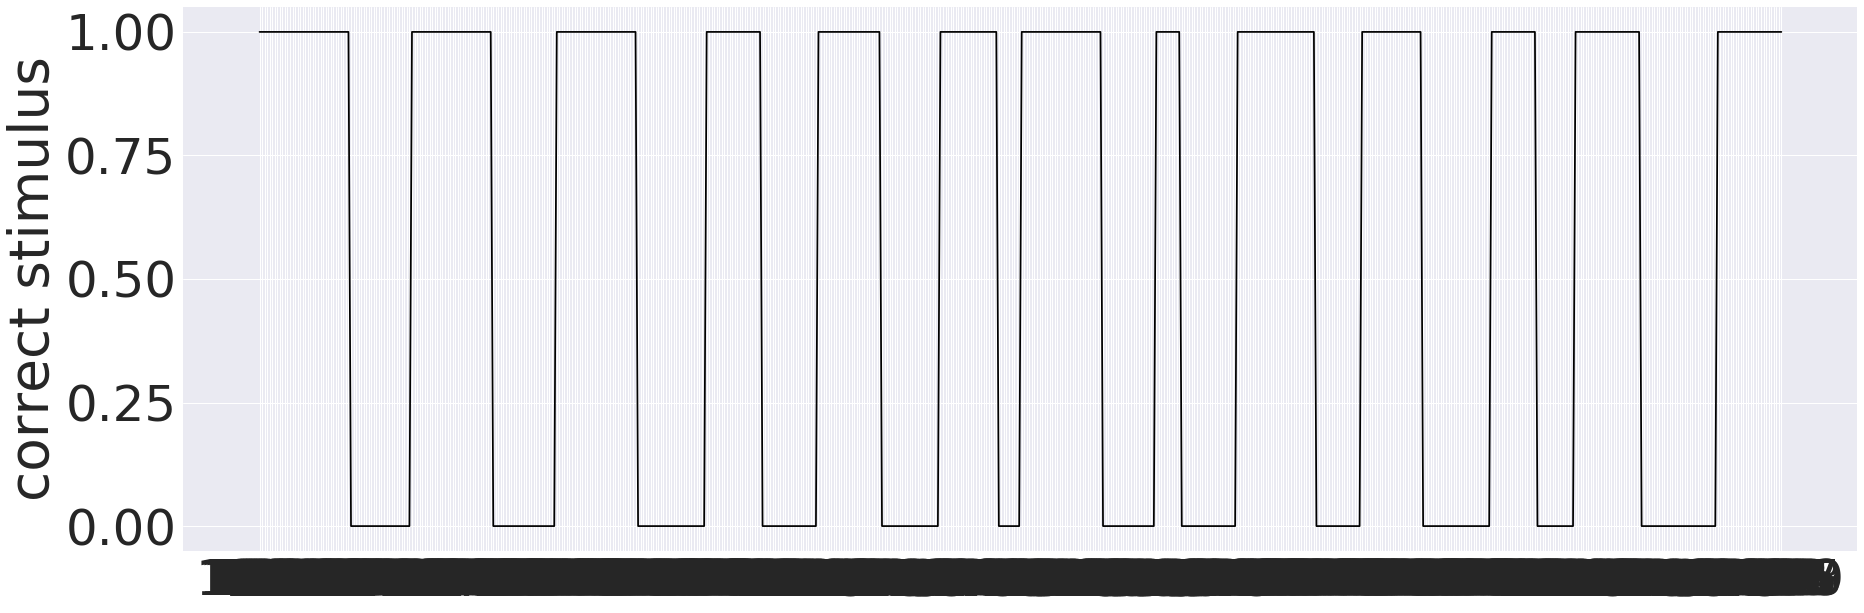

In [28]:
plt.plot(all_obs_data.stimulus[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [29]:
include=['v', 'a', 't']

n_samples, n_burned_samples, n_thin = 2000, 1000, 5

In [32]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~']
signals = (('cpp:C(condition)', 'B:C(condition)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'))
[('a~', 't~'), ('a~', 'v~'), ('t~', 'a~'), ('t~', 'v~'), ('v~', 'a~'), ('v~', 't~')]


In [33]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [34]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
't_cpp_a_B': reg_descriptions[2], 't_cpp_v_B': reg_descriptions[3], 
'v_cpp_a_B': reg_descriptions[4], 'v_cpp_t_B': reg_descriptions[5]}

[['a~cpp:C(condition)', 't~B:C(condition)'], ['a~cpp:C(condition)', 'v~B:C(condition)'], ['t~cpp:C(condition)', 'a~B:C(condition)'], ['t~cpp:C(condition)', 'v~B:C(condition)'], ['v~cpp:C(condition)', 'a~B:C(condition)'], ['v~cpp:C(condition)', 't~B:C(condition)']]


In [36]:
a_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_t_B'], include=include)
a_cpp_t_B_obs_reg.find_starting_values()
a_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_t_B_obs_reg.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(condition)[hc]', 't_B:C(condition)[hv]', 't_B:C(condition)[lc]', 't_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 17972.3 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [37]:
a_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_v_B'], include=include)
a_cpp_v_B_obs_reg.find_starting_values()
a_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_v_B_obs_reg.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 16344.0 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [38]:
t_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['t_cpp_a_B'], include=include)
t_cpp_a_B_obs_reg.find_starting_values()
t_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_a_B_obs_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 18027.0 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [39]:
t_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['t_cpp_v_B'], include=include)
t_cpp_v_B_obs_reg.find_starting_values()
t_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_v_B_obs_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 13439.5 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [ ]:
v_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_a_B'], include=include)
v_cpp_a_B_obs_reg.find_starting_values()
v_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_a_B_obs_reg.db', db='pickle')

In [ ]:
v_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_t_B'], include=include)
v_cpp_t_B_obs_reg.find_starting_values()
v_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_t_B_obs_reg.db', db='pickle')

In [ ]:
dics = [a_cpp_t_B_obs_reg.dic, a_cpp_v_B_obs_reg.dic,t_cpp_a_B_obs_reg.dic,
        t_cpp_v_B_obs_reg.dic, v_cpp_a_B_obs_reg.dic, v_cpp_t_B_obs_reg.dic]
m_names = ['a_cpp & t_B', 'a_cpp &  v_B', 't_cpp & a_B',
          't_cpp & v_B','v_cpp & a_B', 'v_cpp & t_B']

In [46]:
dics

[-8391.3787389714598,
 -9477.461953207192,
 -8832.6922868181937,
 -10156.10438307834,
 -8141.2342060888368,
 -8382.2441913813018]

Plotting v
Plotting v_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_cpp:C(condition)[hc]
Plotting a_cpp:C(condition)[hv]
Plotting a_cpp:C(condition)[lc]
Plotting a_cpp:C(condition)[lv]
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_B:C(condition)[hc]
Plotting t_B:C(condition)[hv]
Plotting t_B:C(condition)[lc]
Plotting t_B:C(condition)[lv]
Plotting t
Plotting t_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_cpp:C(condition)[hc]
Plotting a_cpp:C(condition)[hv]
Plotting a_cpp:C(condition)[lc]
Plotting a_cpp:C(condition)[lv]


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_B:C(condition)[hc]
Plotting v_B:C(condition)[hv]
Plotting v_B:C(condition)[lc]
Plotting v_B:C(condition)[lv]
Plotting v
Plotting v_std
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_cpp:C(condition)[hc]
Plotting t_cpp:C(condition)[hv]
Plotting t_cpp:C(condition)[lc]
Plotting t_cpp:C(condition)[lv]
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_B:C(condition)[hc]
Plotting a_B:C(condition)[hv]
Plotting a_B:C(condition)[lc]
Plotting a_B:C(condition)[lv]
Plotting a
Plotting a_std
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_cpp:C(condition)[hc]
Plotting t_cpp:C(condition)[hv]
Plotting t_cpp:C(condition)[lc]
Plotting t_cpp:C(condition)[lv]
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_B:C(condition)[hc]
Plotting v_B:C(condition)[hv]
Plotting v_B:C(condition)[lc]
Plotting v_B:C(condition)[lv]
Plotting t
Plotting t_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_cpp:C(condition)[hc

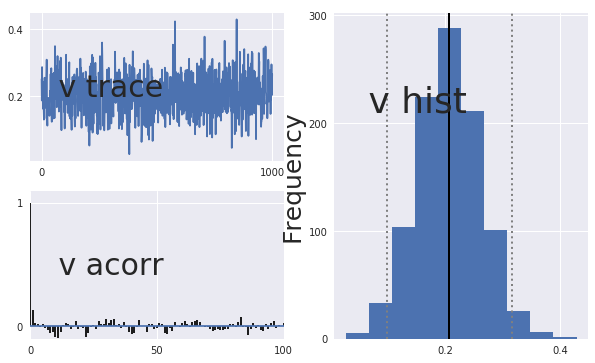

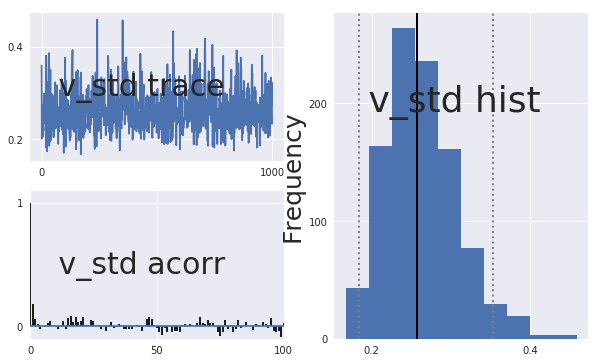

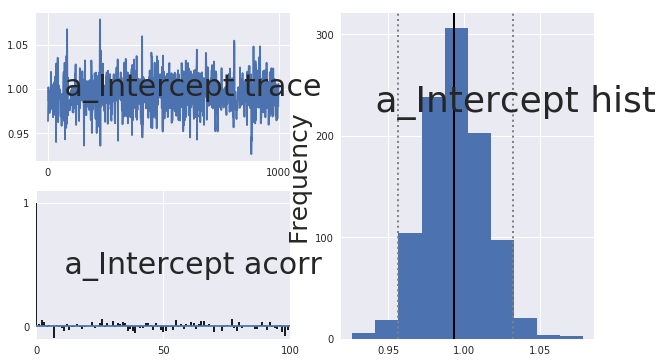

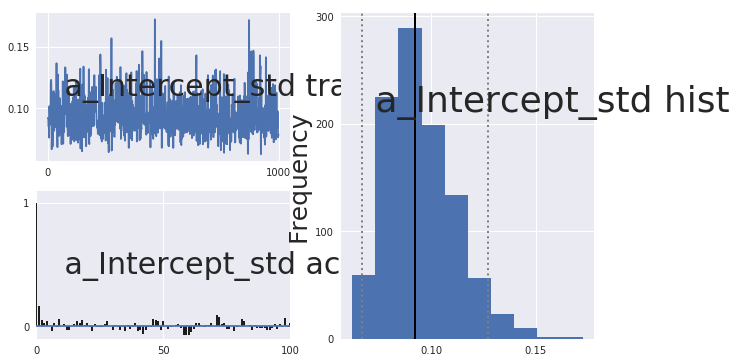

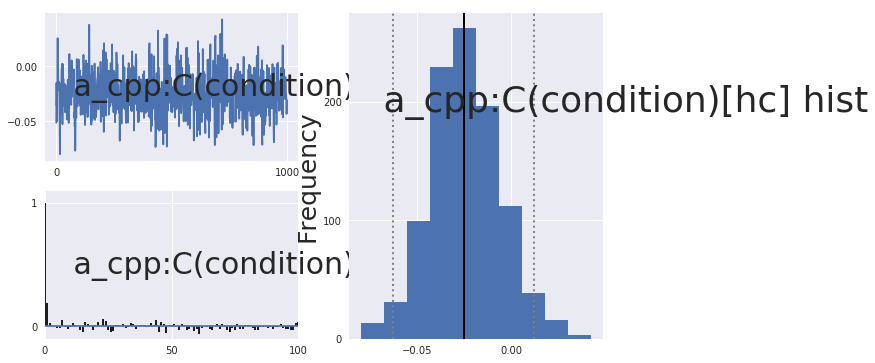

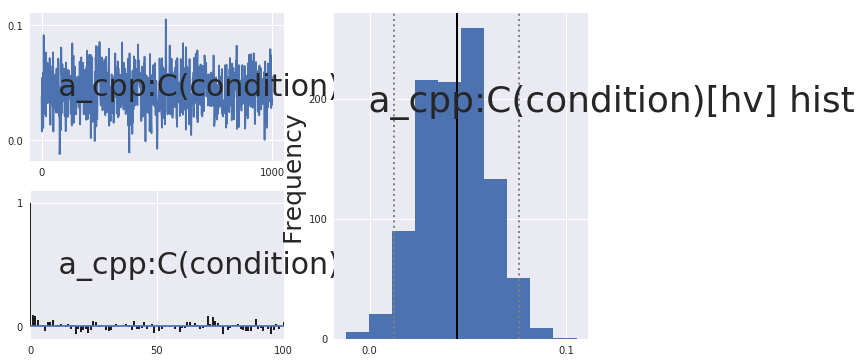

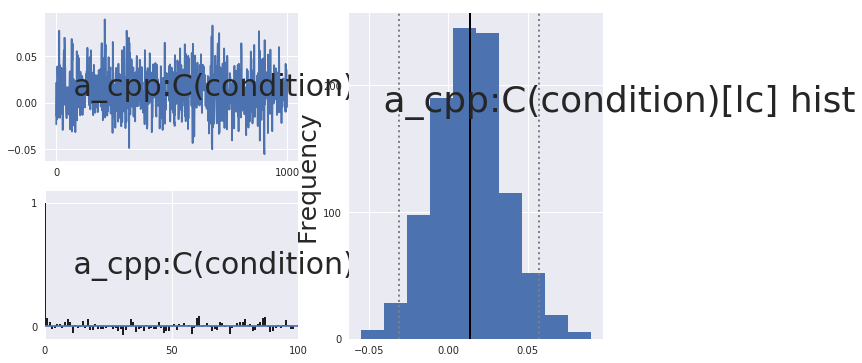

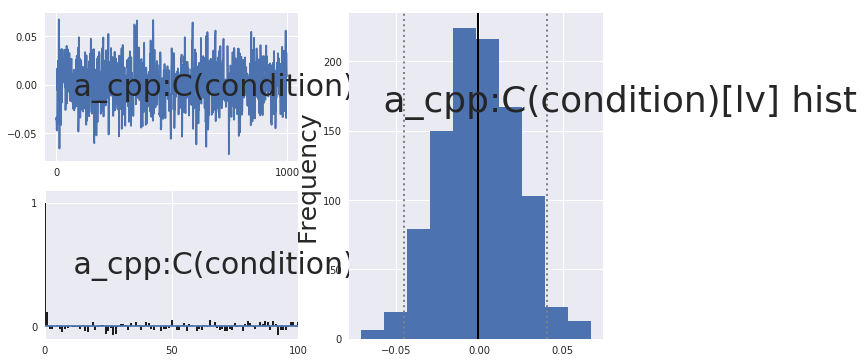

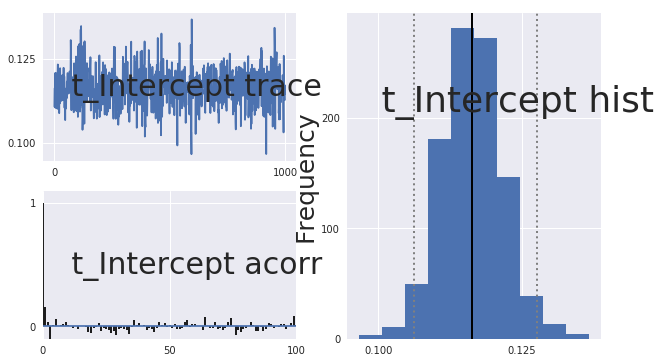

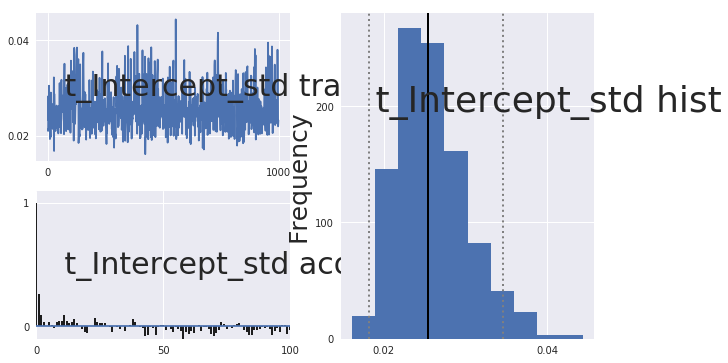

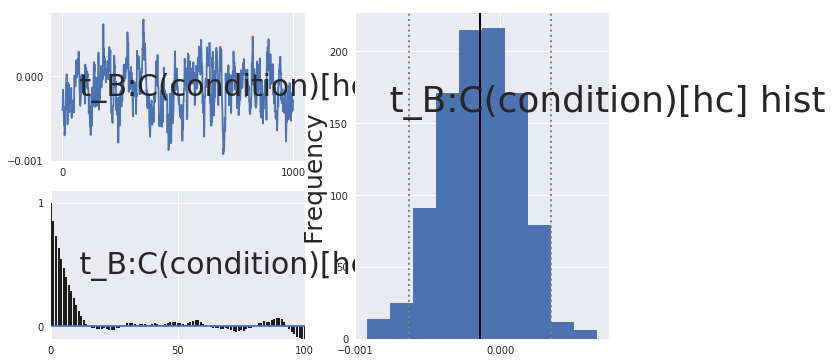

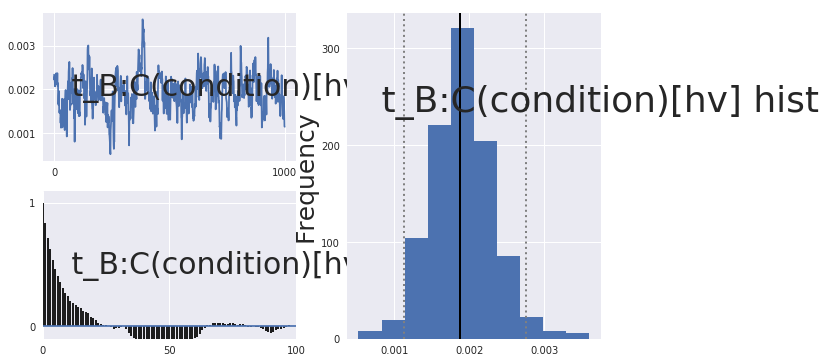

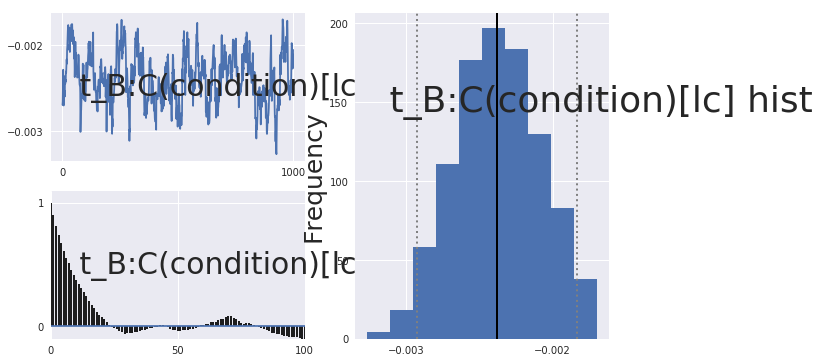

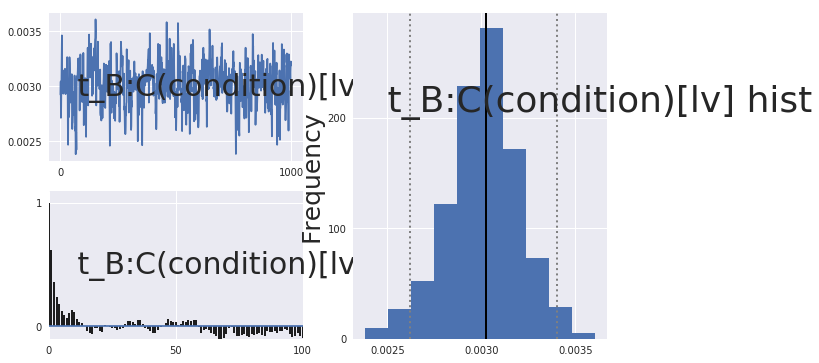

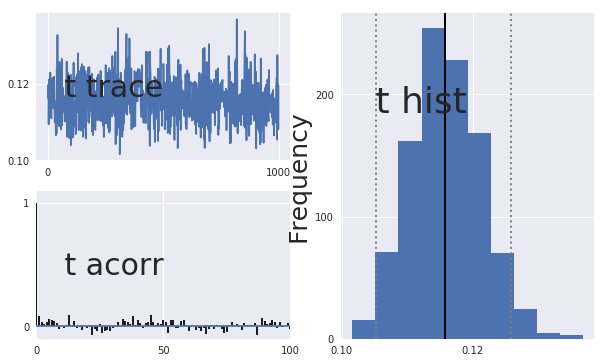

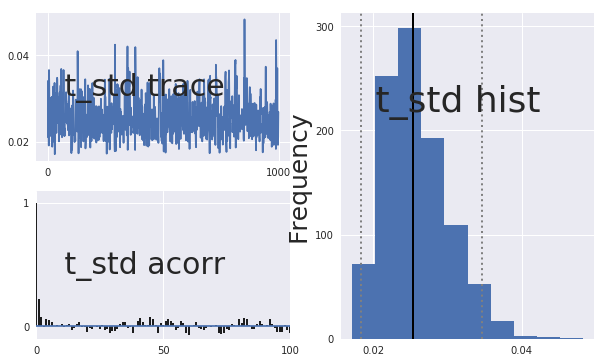

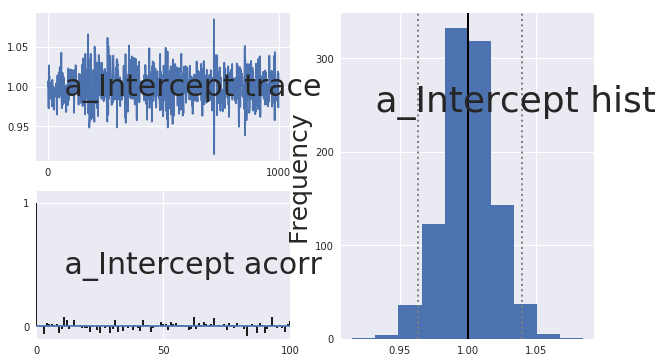

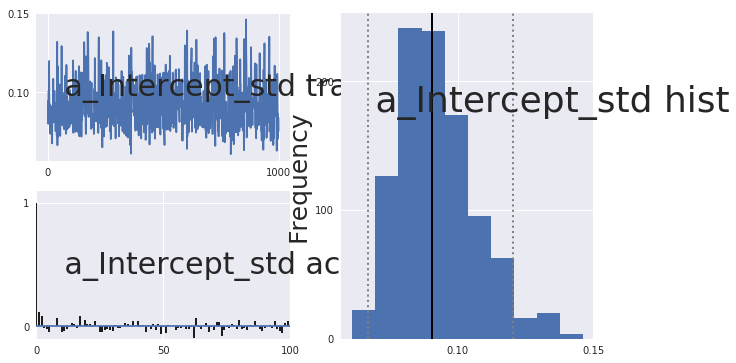

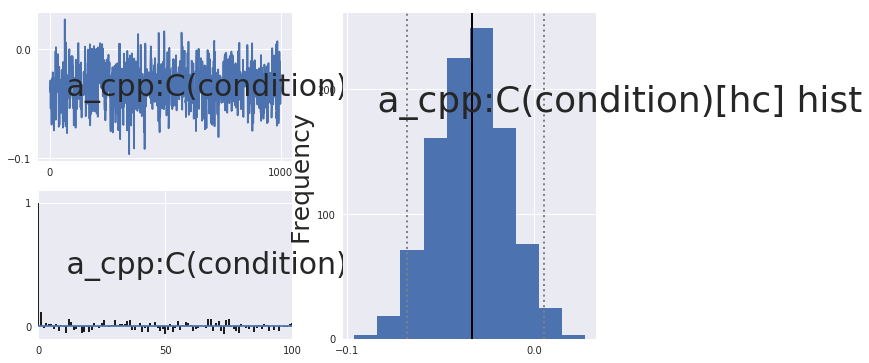

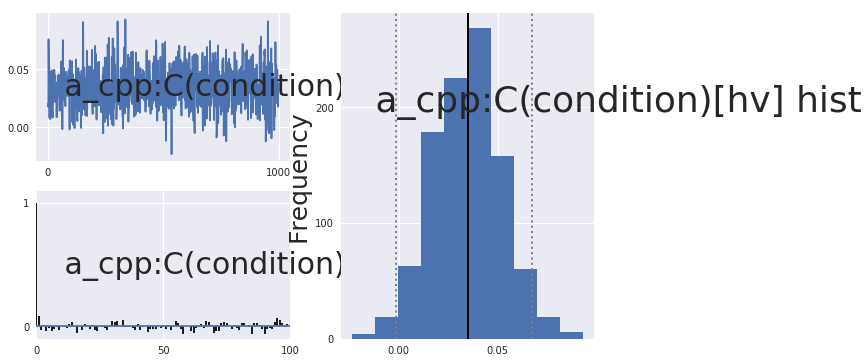

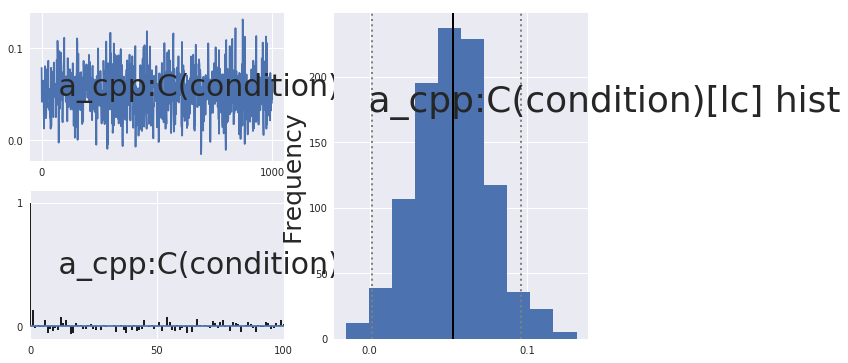

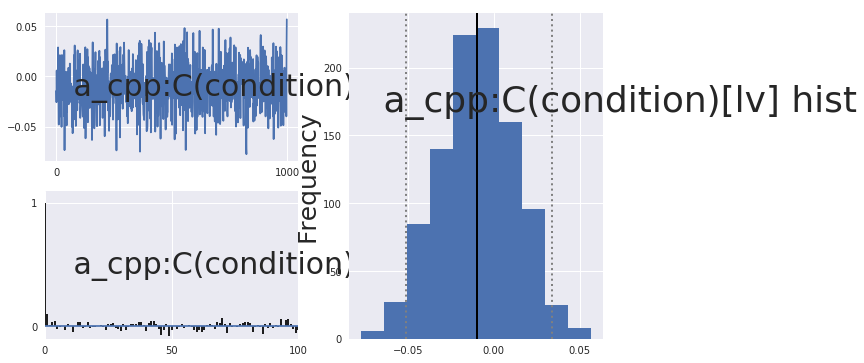

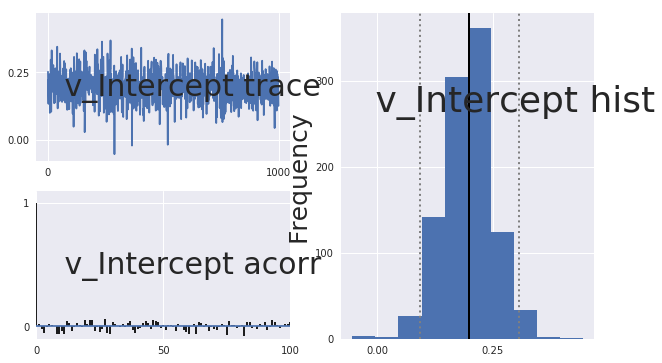

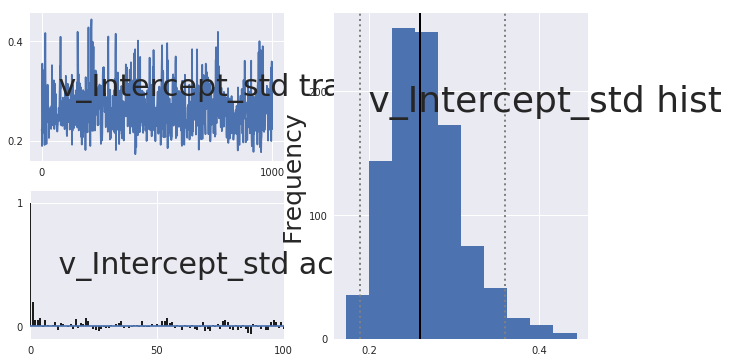

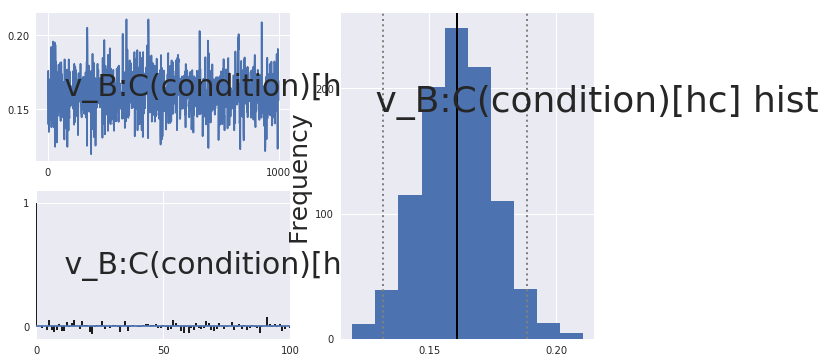

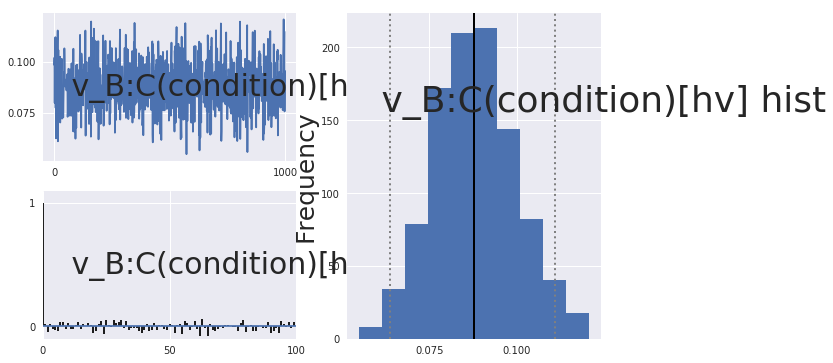

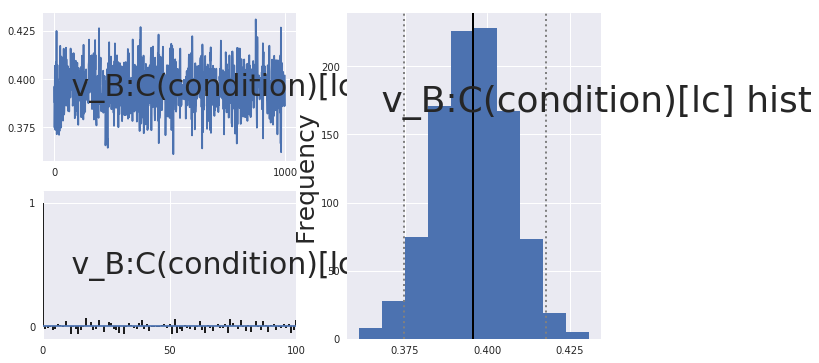

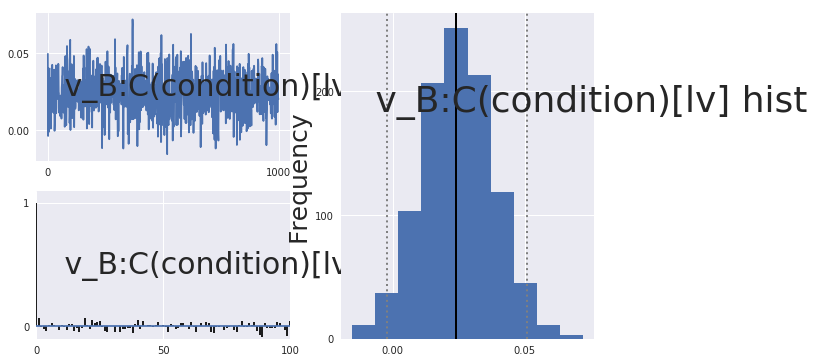

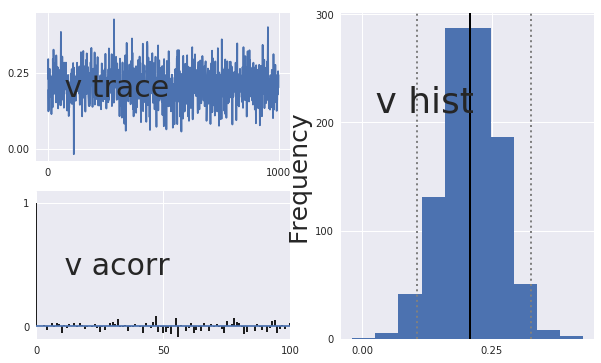

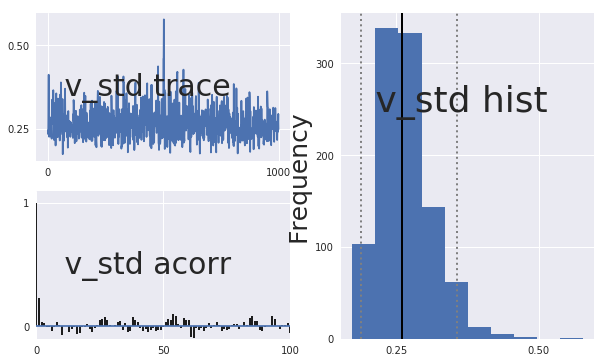

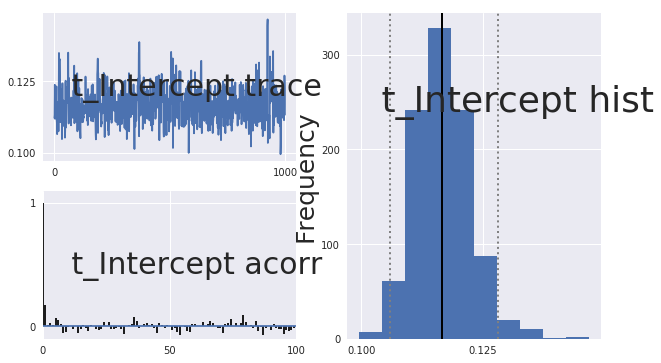

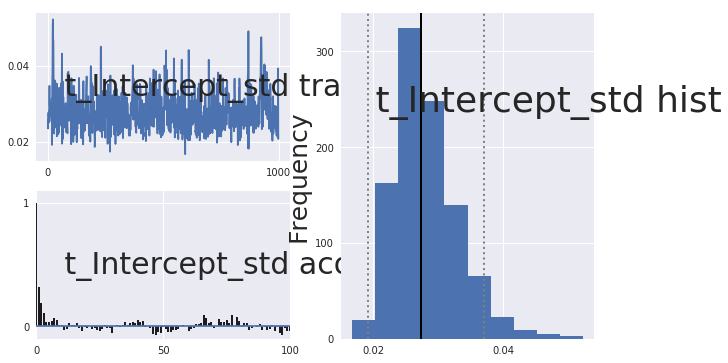

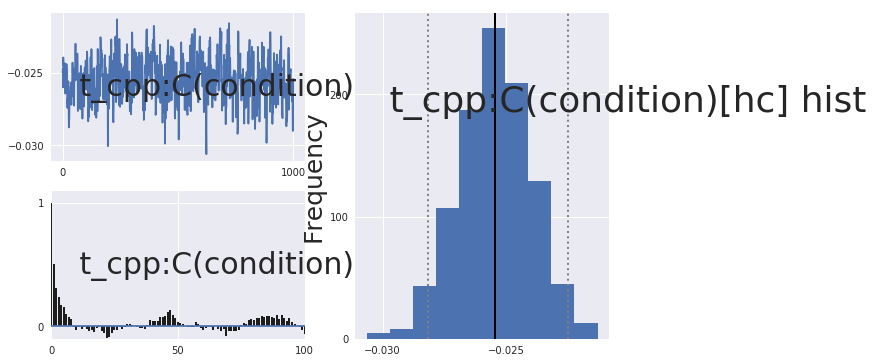

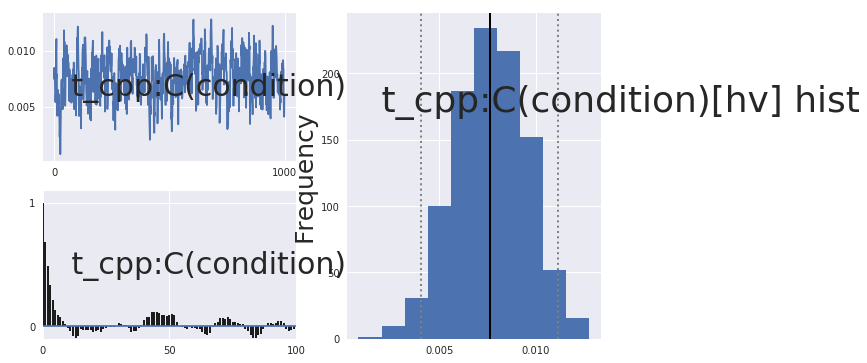

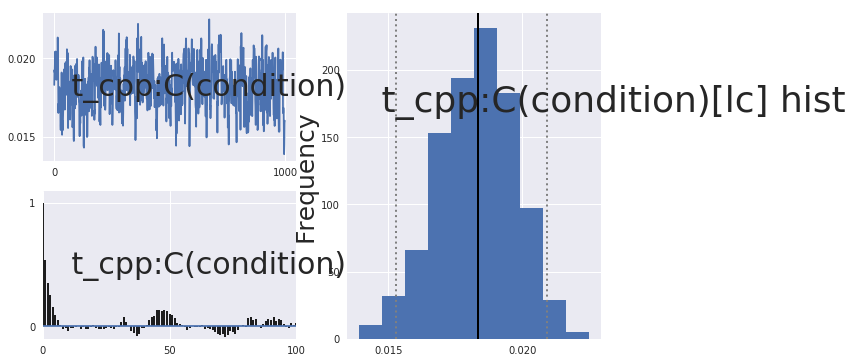

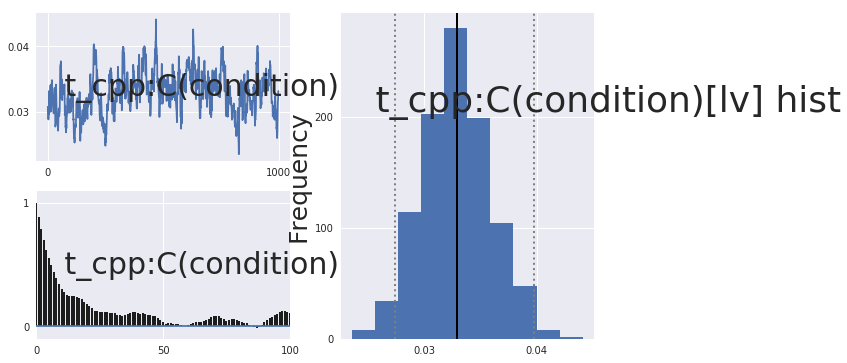

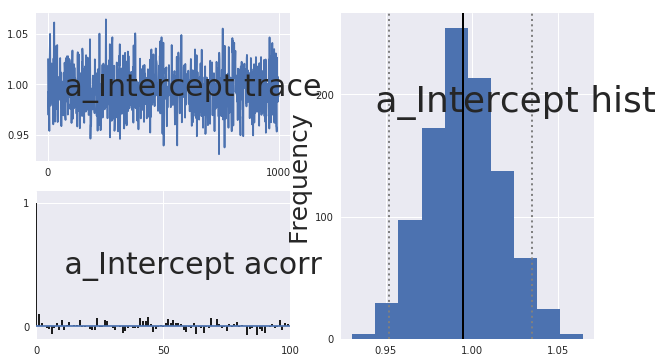

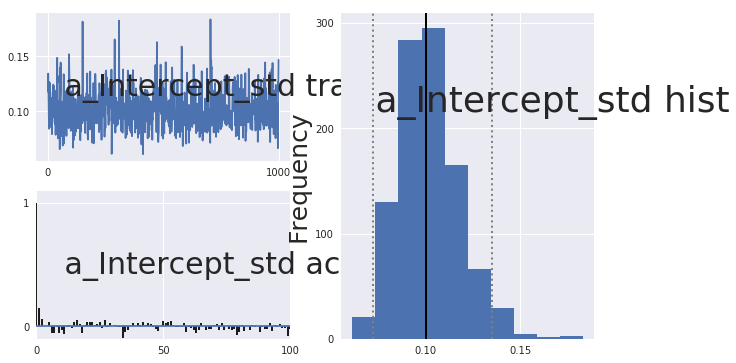

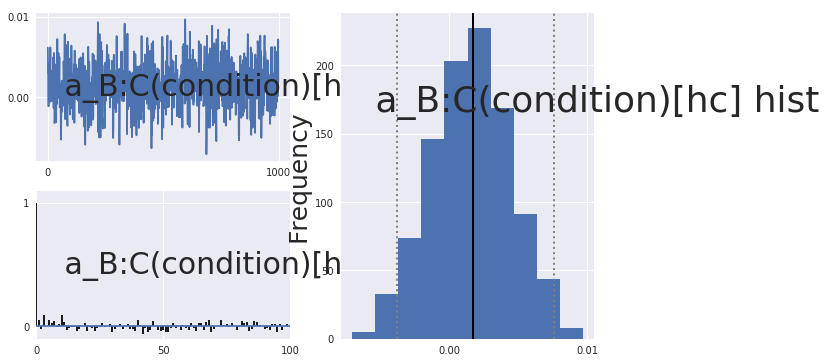

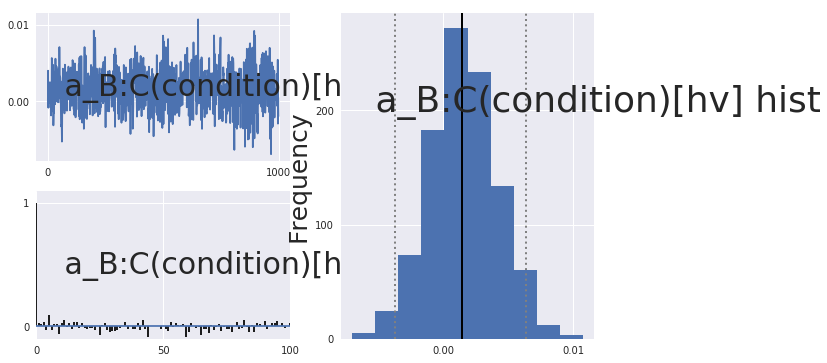

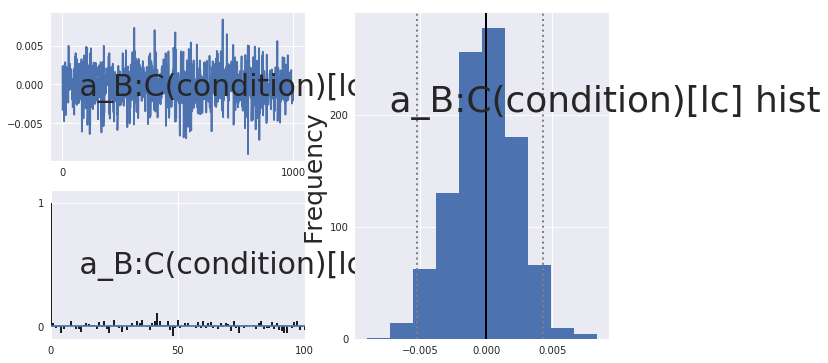

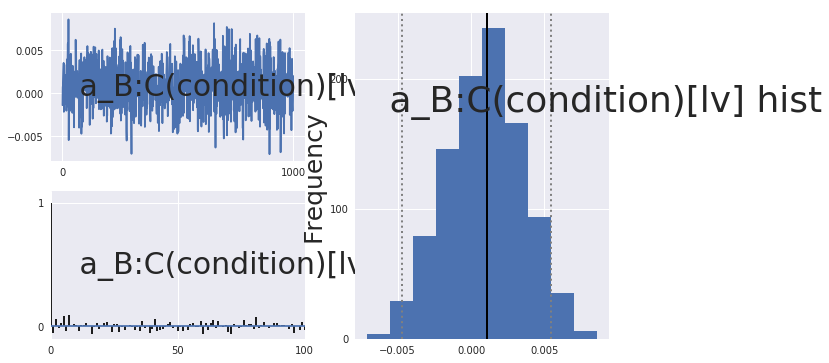

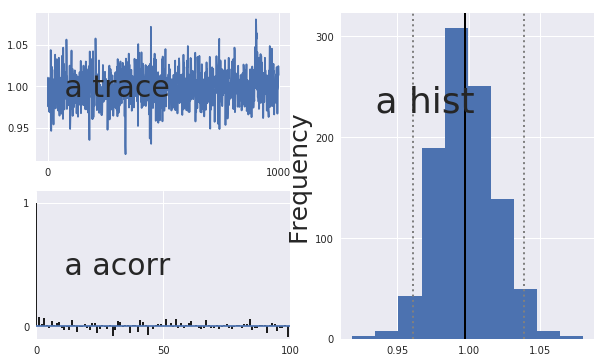

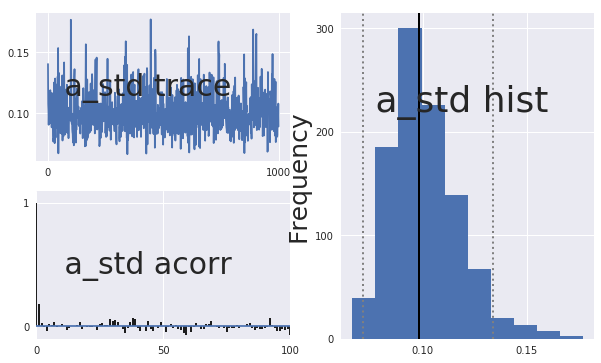

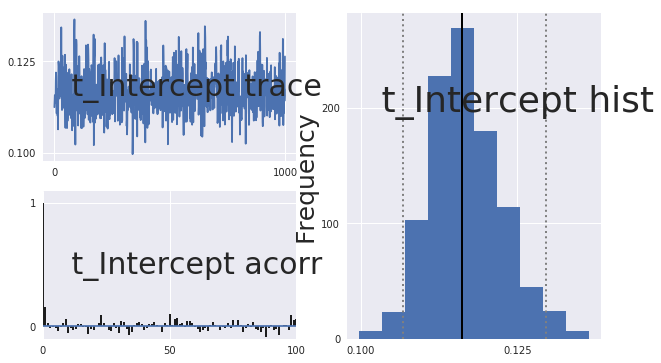

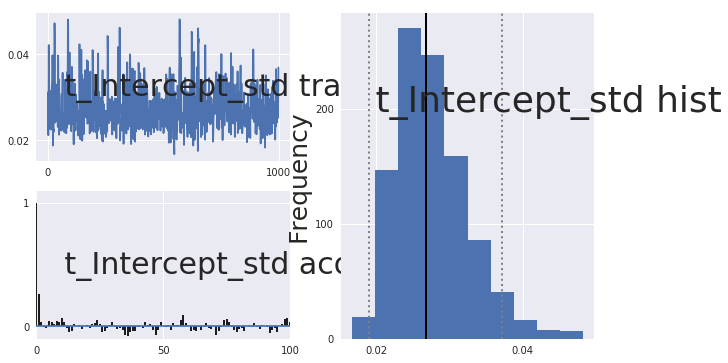

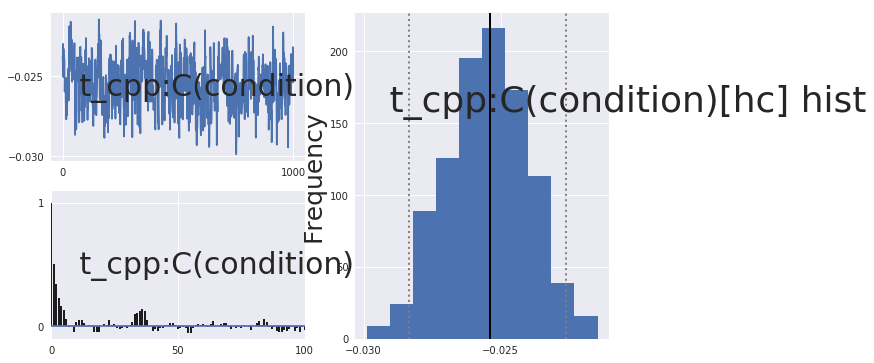

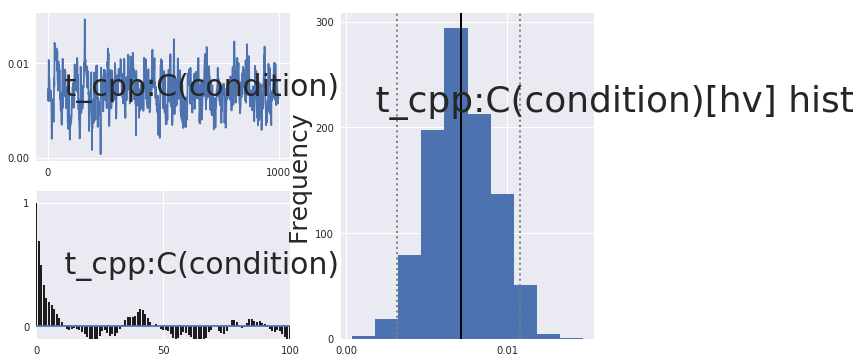

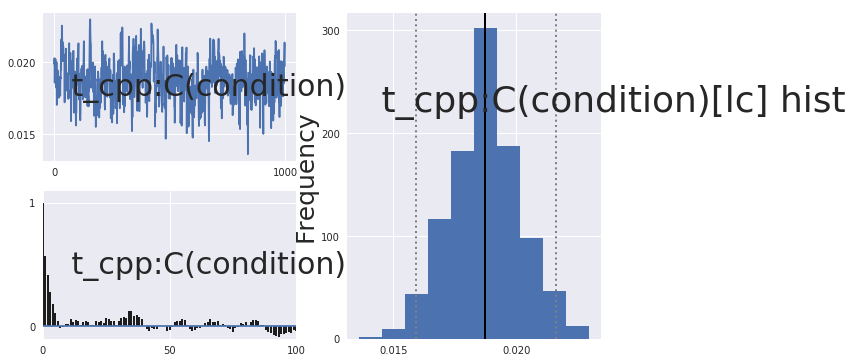

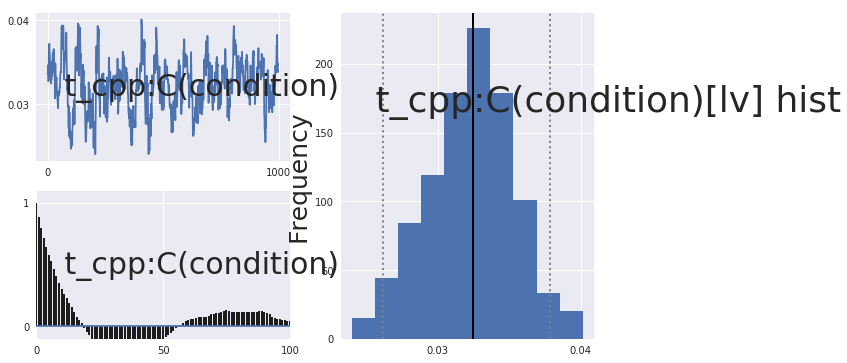

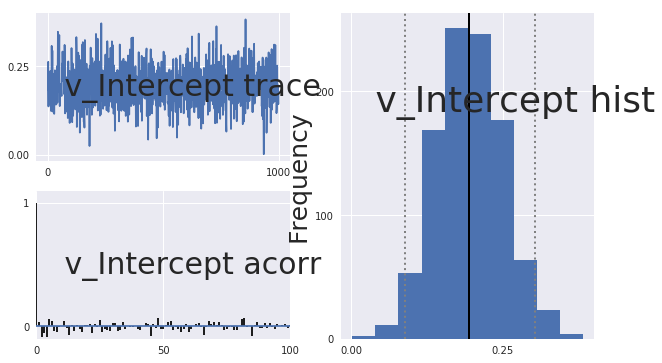

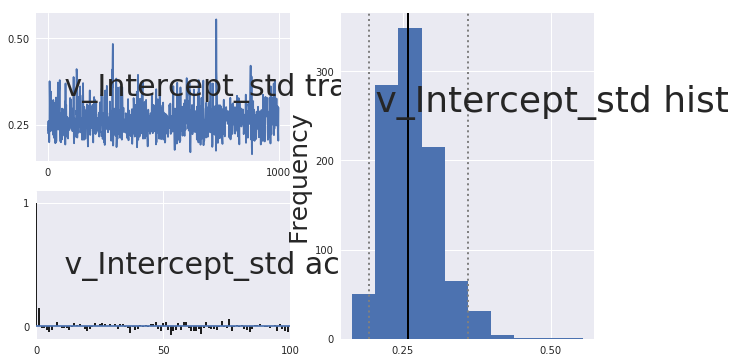

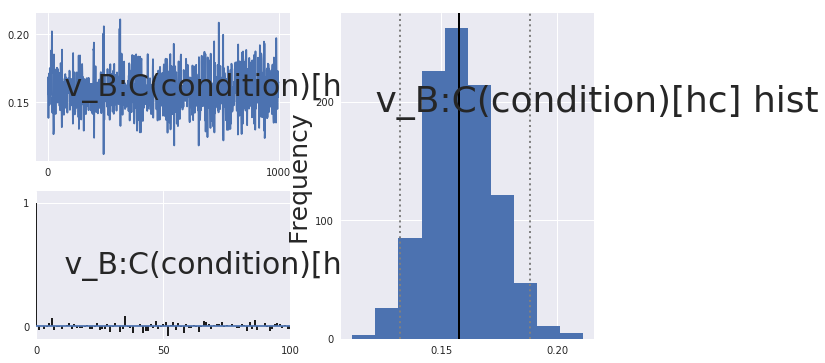

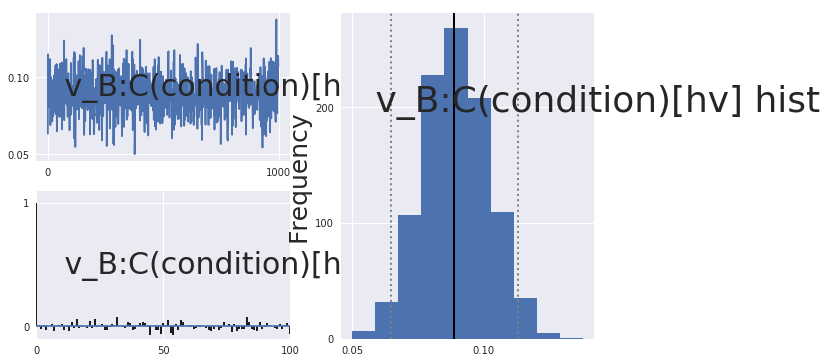

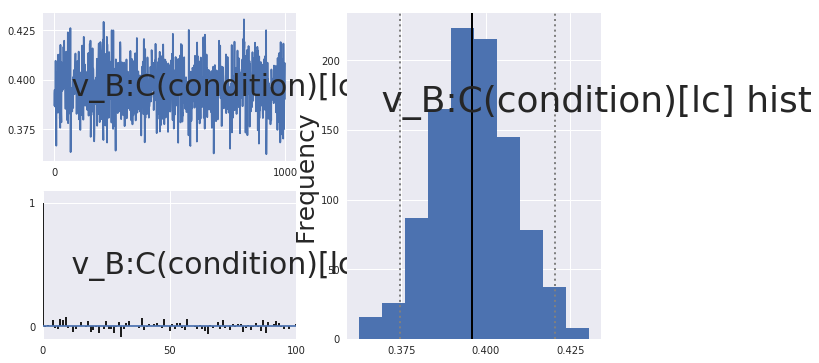

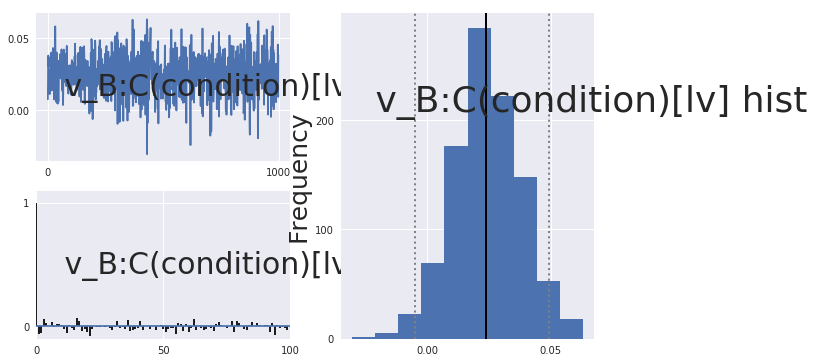

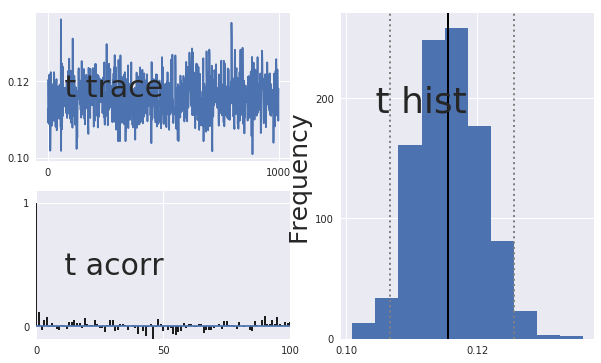

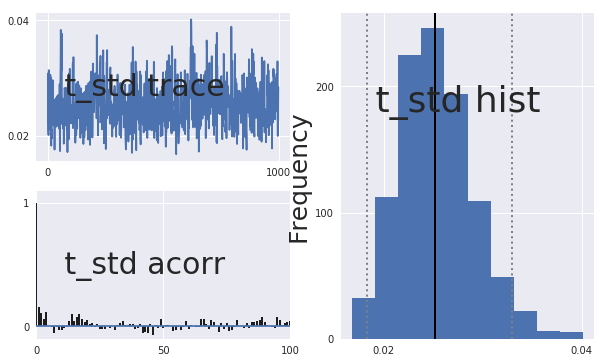

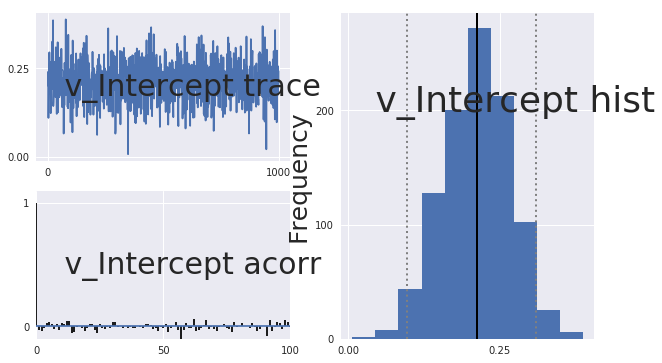

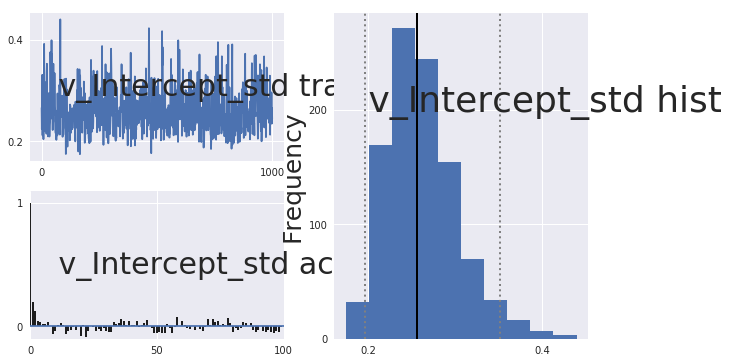

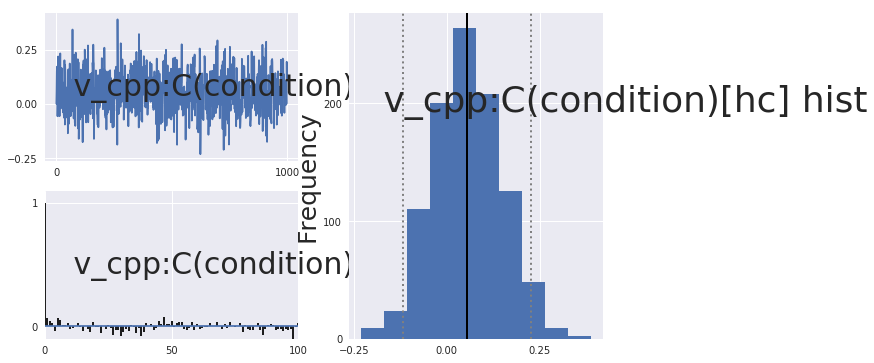

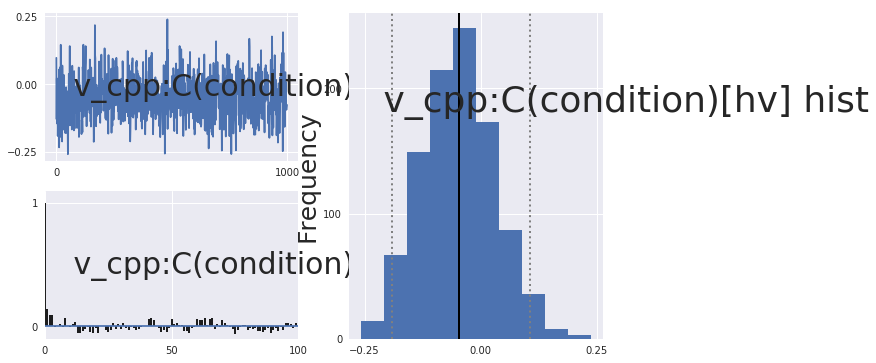

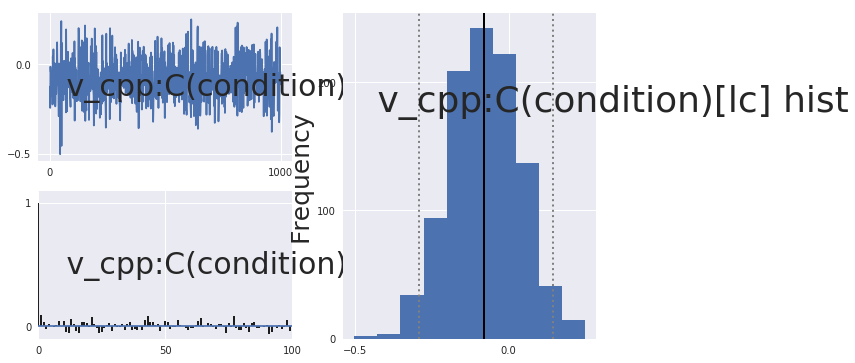

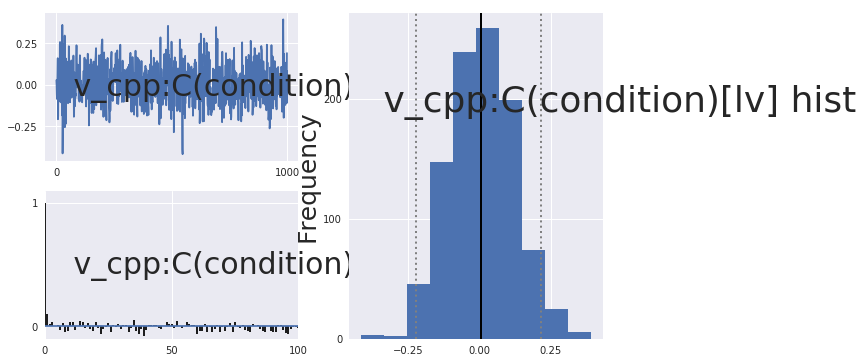

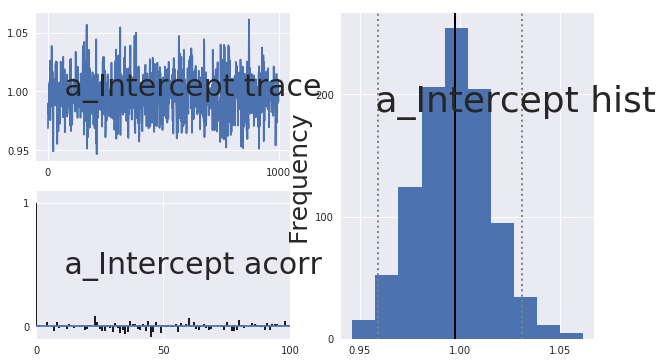

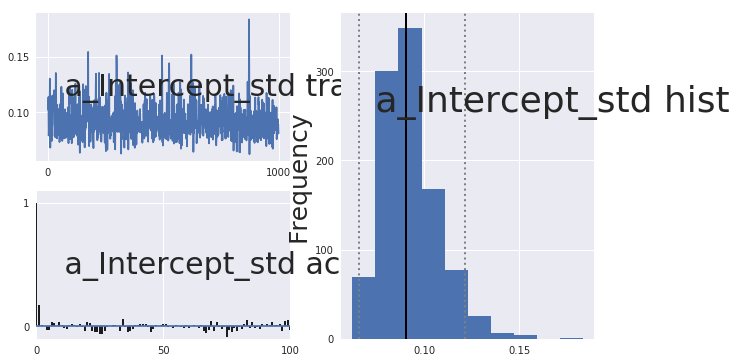

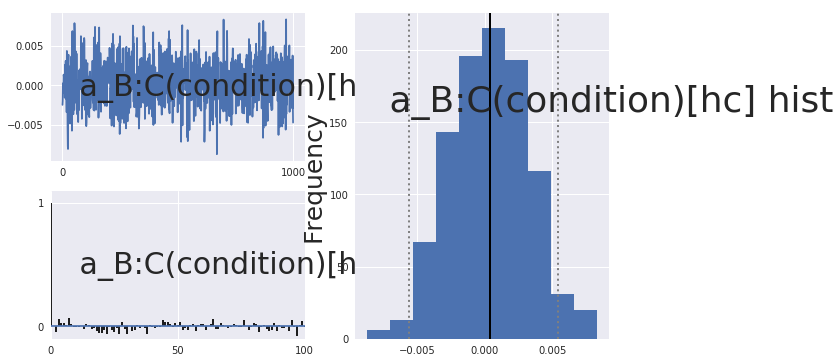

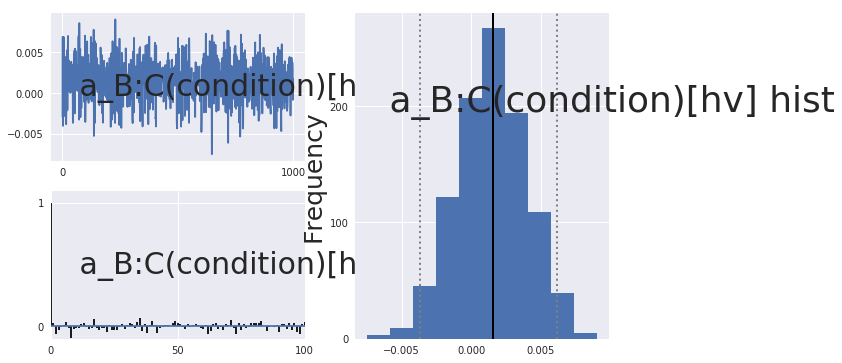

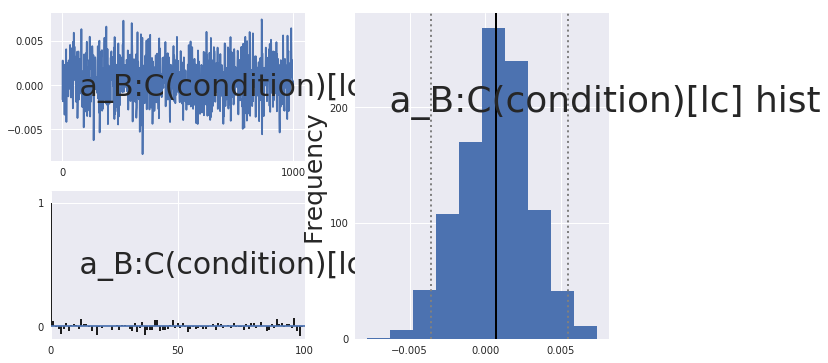

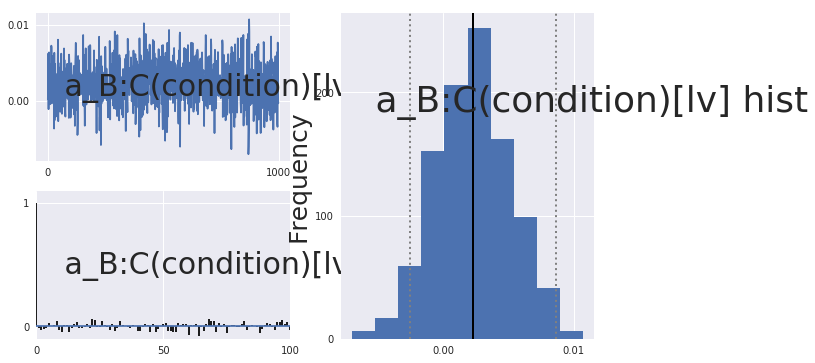

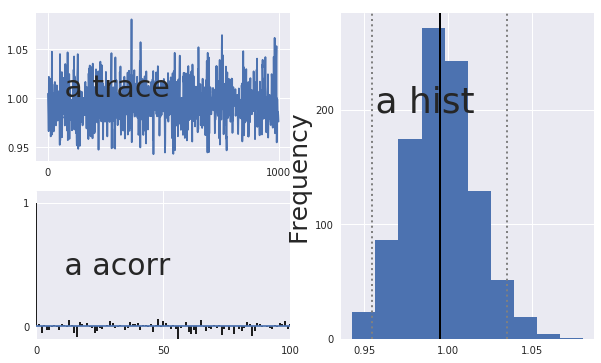

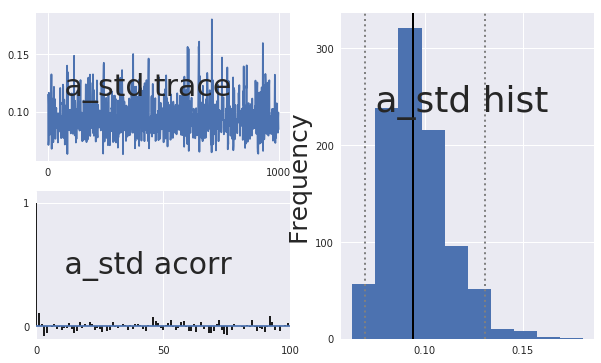

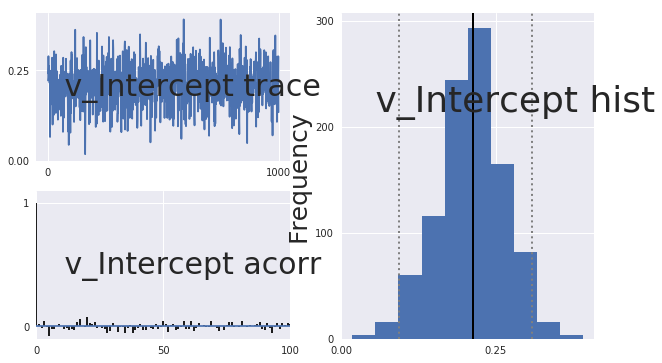

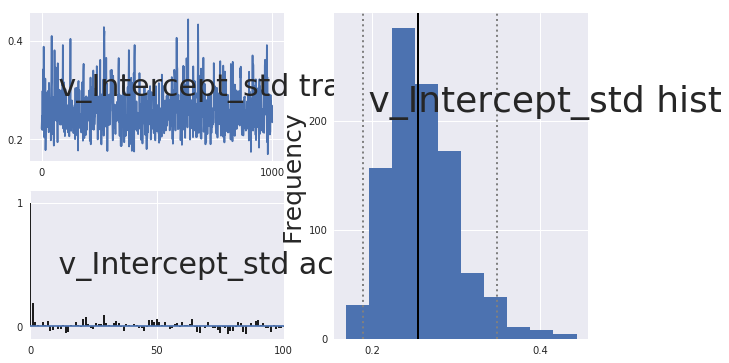

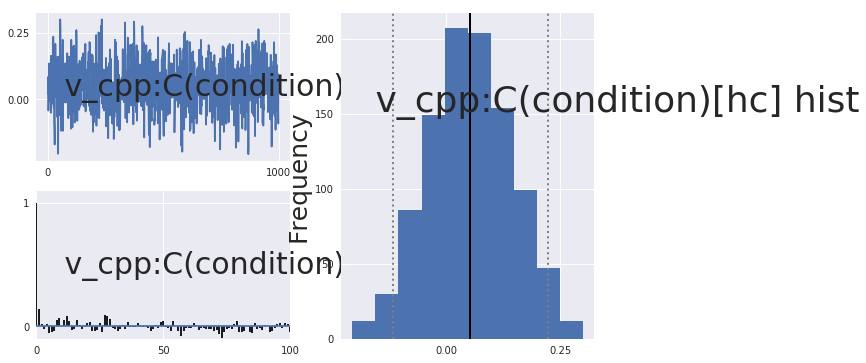

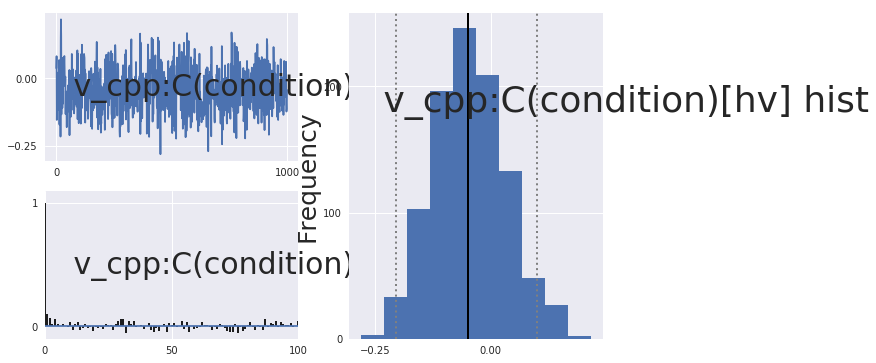

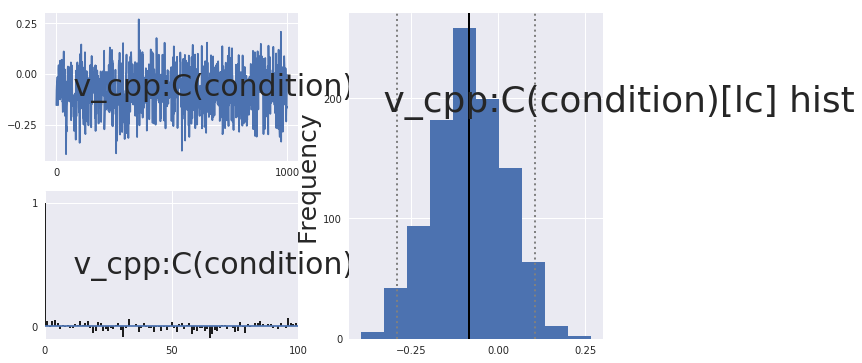

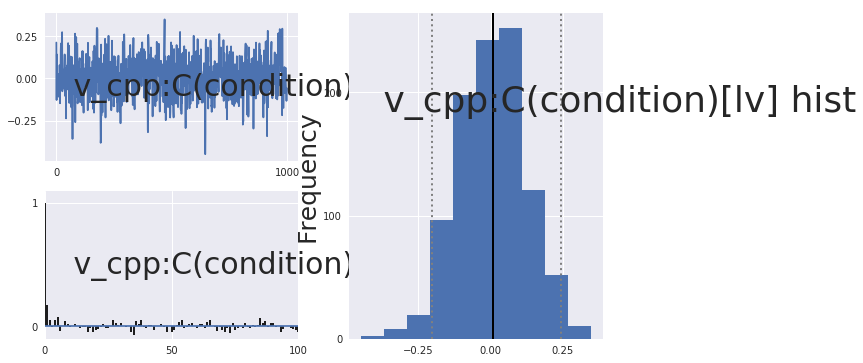

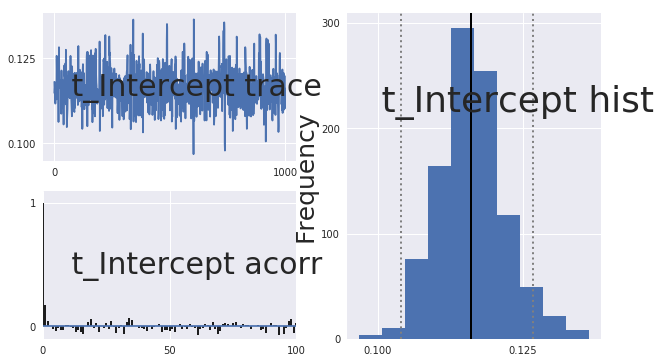

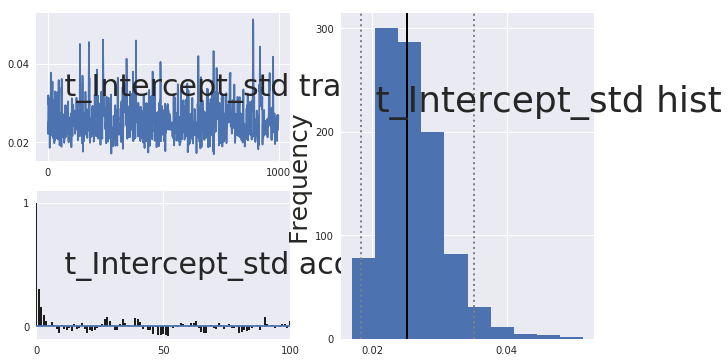

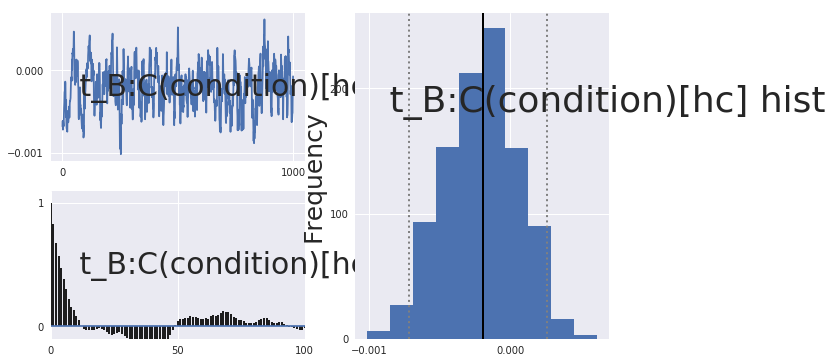

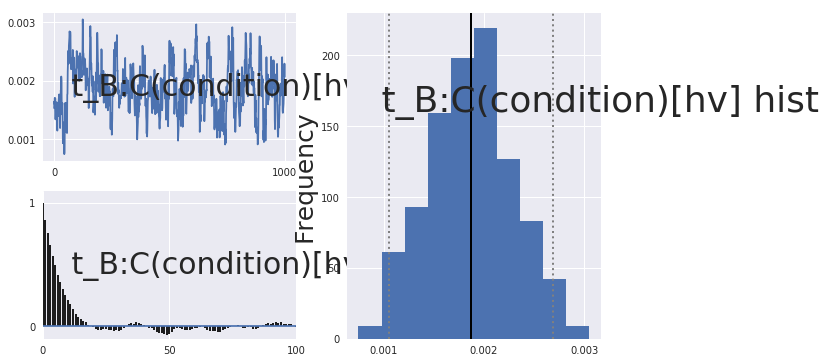

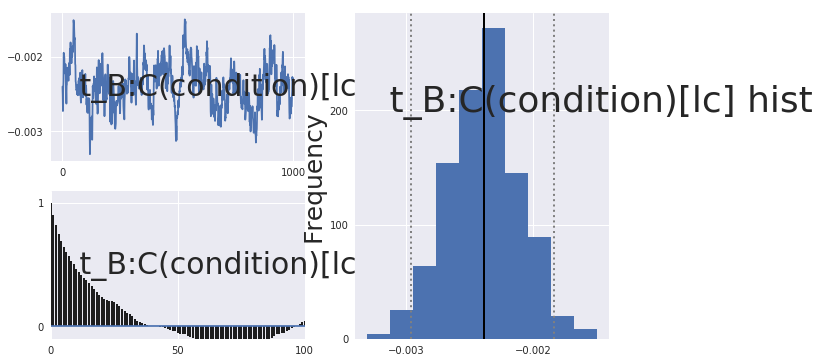

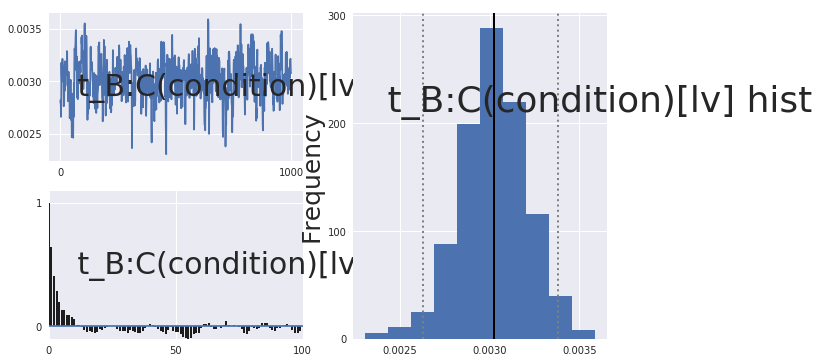

In [54]:
#check convergence
a_cpp_t_B_obs_reg.plot_posteriors()
a_cpp_v_B_obs_reg.plot_posteriors()
t_cpp_a_B_obs_reg.plot_posteriors()
t_cpp_v_B_obs_reg.plot_posteriors()

v_cpp_a_B_obs_reg.plot_posteriors()
v_cpp_t_B_obs_reg.plot_posteriors()

Text(0.5,1,'All pairwise combinations of parameters and learning signals')

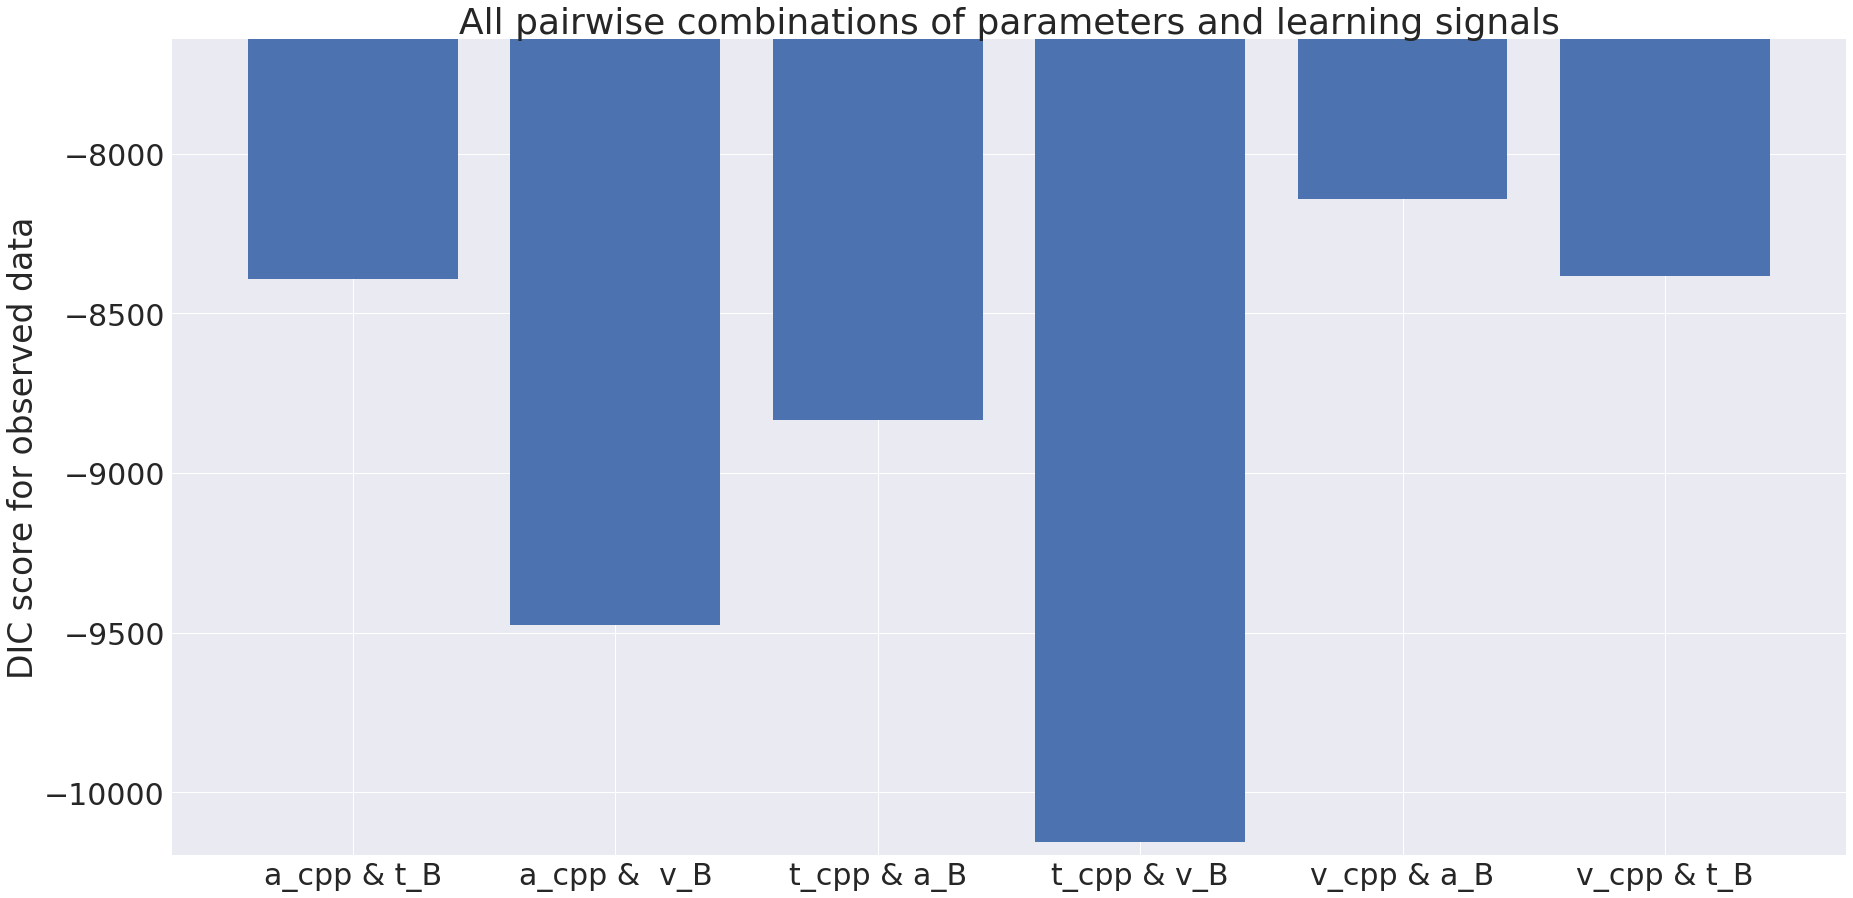

In [53]:
#plot dic scores
plt.figure(figsize=(30,15))
sns.set(font_scale=3)  
plt.bar(m_names, dics)
plt.ylim(min(dics) - 40, max(dics) + 500)
plt.ylabel('DIC score for observed data')
plt.title('All pairwise combinations of parameters and learning signals')

In [57]:
t_cpp_v_B_obs_reg.plot_posterior_predictive()

<Figure size 576x432 with 0 Axes>

In [ ]:
#plot posteriors for second-to-winning model 
v_hc_gen, v_hv_gen,  v_lc_gen, v_lv_gen = a_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


a_hc_gen, a_hv_gen, a_lc_gen, a_lv_gen = a_cpp_v_B_obs_reg.nodes_db.ix[['a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 
                                                             'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]'],
                                                          'node']

In [82]:
#plot posteriors for winning model 
v_hc, v_hv,  v_lc, v_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc, t_hv, t_lc, t_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Text(0.5,1,'Posteriors of cpp-> non-decision time effect')

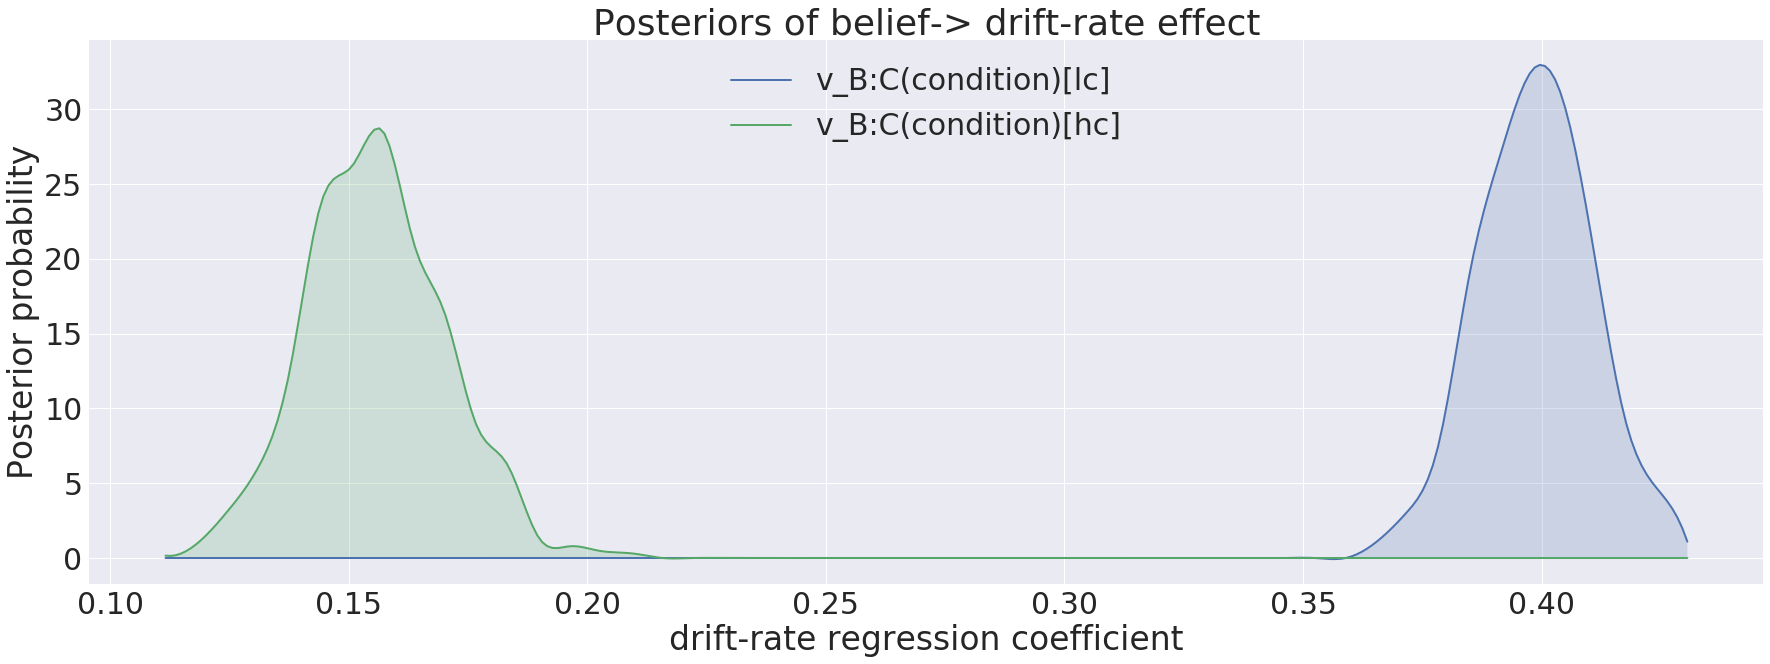

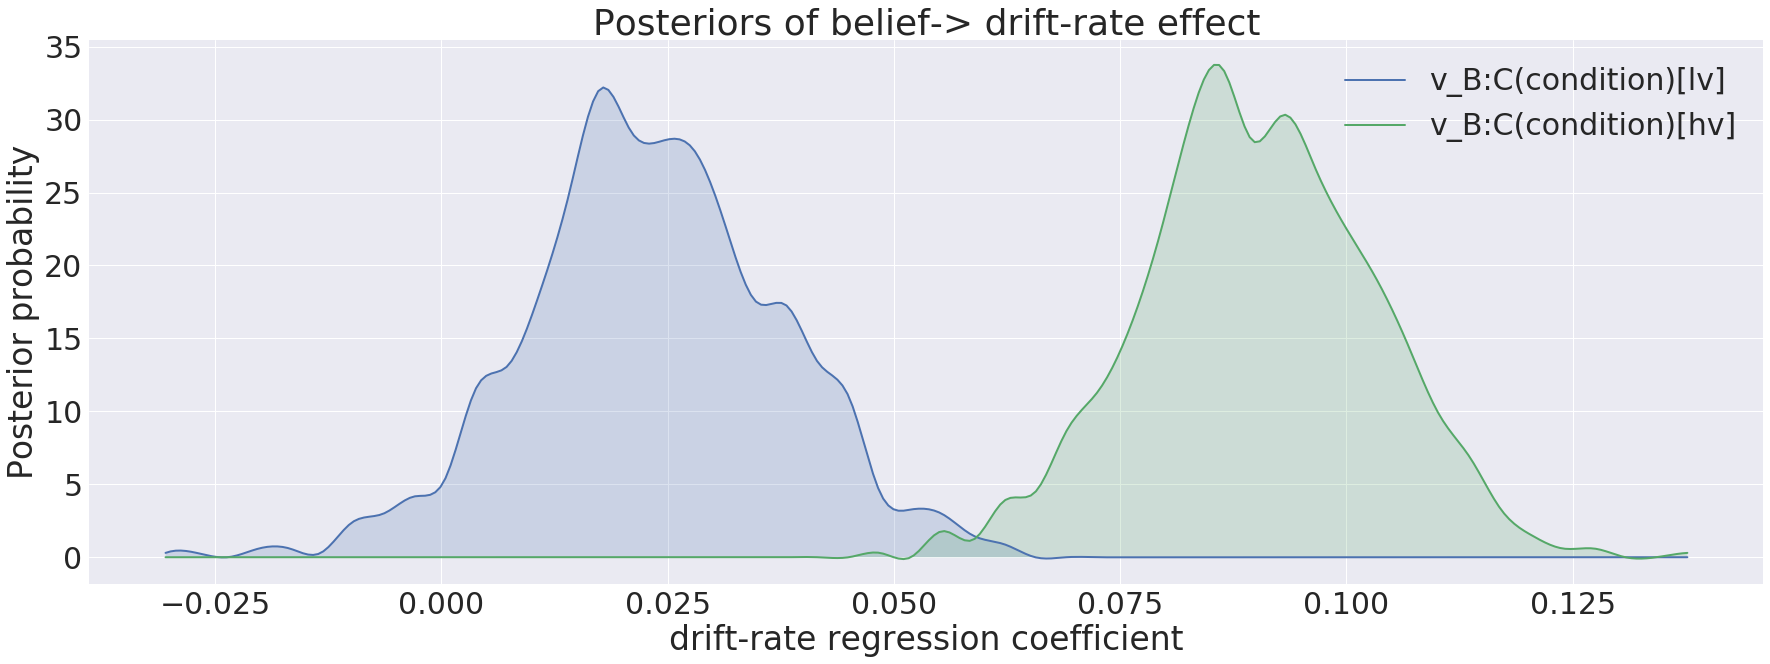

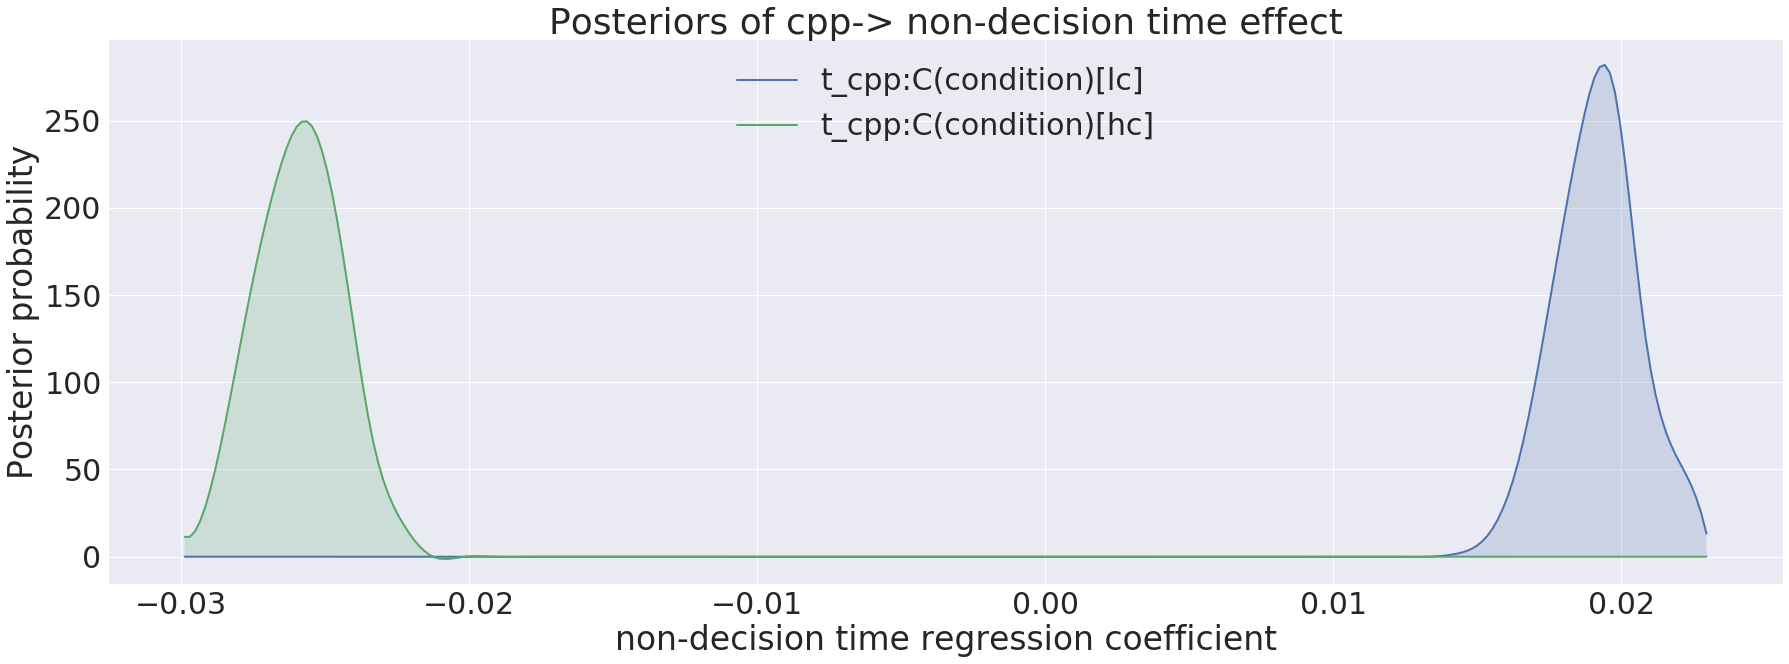

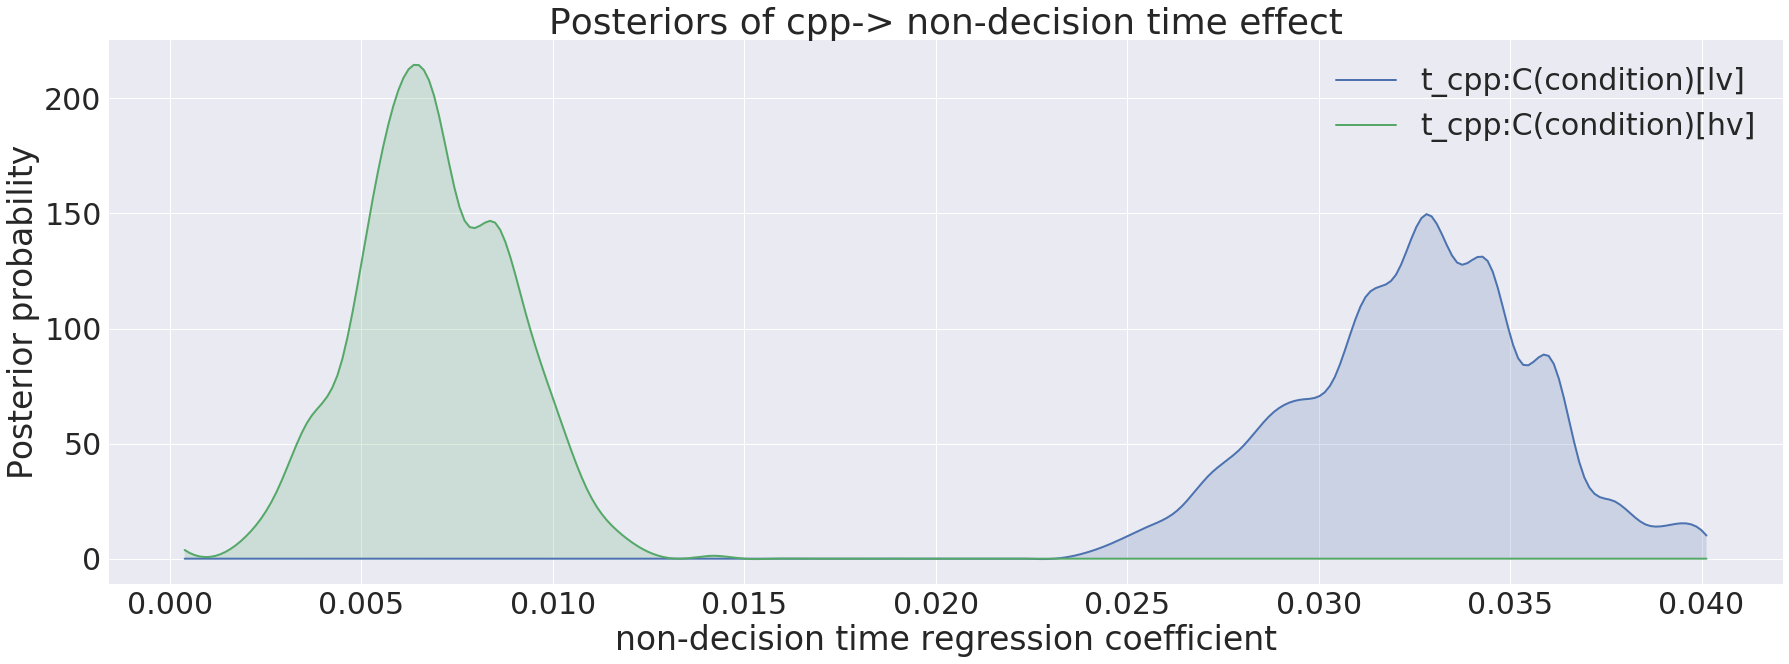

In [84]:
hddm.analyze.plot_posterior_nodes([v_lc, v_hc])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv, v_hv])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([t_lc, t_hc])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([t_lv, t_hv])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_vol.pdf')


In [1]:
plt.plot(all_obs_data.condition, all_obs_data.rt)

NameError: name 'plt' is not defined

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')